In [1]:
import GAN.models as models
import ganja.io as io
import ganja.utils as utils
import ganja.plotting as plotting
import ganja.preprocessing as preprocessing
import ganja.plotting as plotting

import json


import matplotlib
matplotlib.style.use('seaborn-poster')


Using TensorFlow backend.


Welcome to JupyROOT 6.10/02


In [2]:
from  keras.models import load_model

In [3]:
# target = 'log/rerun_unnorm_nt4_l2_sm_wtot_gtot_tau5m4_gtau5_df4_gan_lw1'
# target = 'log/unnorm_l2_sm_gtot_gtau5_df4_gan_lw0p5'
# target = 'log/unnorm_nt4_l2_sm_wtot_gtot_tau5m4_gtau5_df4_gan_lw1/'
# target = 'log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau2m5_gtau4p5_df4_gan_lw1'
# target = 'log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lw1'
# target = 'log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg6m8_lw1'
# target = 'log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg6m8_lw1'
# target = 'log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg6m8_lw1'
target = 'log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1'

with open(target+'/config.json') as fin:
    training_parameters = json.loads(fin.read())
    
globals().update(training_parameters)

training_parameters

{'BASE_FOLDER': '/scratch/snx3000/musella/ganja/split',
 'BATCH': True,
 'BATCH_SIZE': 256,
 'COMPRESSED': False,
 'COND_VARIABLES': ['ptGen', 'etaGen', 'phiGen', 'nPU'],
 'DECODING_FILTER_SIZE': 3,
 'DECODING_LAST_PLATEAU': 2,
 'DISC_DO_TOTAL': True,
 'DISC_NFILTERS': 4,
 'DISC_OBO_LAYERS': 0,
 'DISC_OBO_NCH': 0,
 'DISC_OBO_NCH_MIN': 4,
 'DISC_OBO_NCH_RED': 0,
 'DISC_TOTAL_LAYERS': [64, 64, 32, 16],
 'ENCODING_FILTER_SIZE': 3,
 'EPOCHS': 30,
 'GAN_LOSS': 'binary_crossentropy',
 'GAN_TOTAL_WEIGHT': 5.0,
 'IMG_SIZE': 32,
 'LOAD_GENERATOR_WEIGHTS': '',
 'LOSS': 'SoftMaskWeightedMeanSquaredErrorWithTotal',
 'LOSS_ALPHA': 1.0,
 'LOSS_LMBD': 1.0,
 'LOSS_RADIAL_WEIGHTS': False,
 'LOSS_TAU': 1e-05,
 'LOSS_TAU2': 0.0,
 'LOSS_USE_LAST': False,
 'LOSS_WEIGHT': 1.0,
 'LR': 0.0002,
 'LR_DECAY': 6e-08,
 'LR_DECAY_DISC': 6e-08,
 'LR_DECAY_GEN': 1e-07,
 'LR_DISC': 0.0002,
 'LR_GEN': 0.0002,
 'MAX_ENCODING': 16,
 'MOMENTS': 'moments_nov2.npz',
 'MONITOR_DIR': 'log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot

In [4]:
# metrics = df.read_csv(target+'/')

In [5]:
import os

with open(BASE_FOLDER+'/'+VERSION+'/train_valid_test.json') as fin:
    split_map = json.loads(fin.read())


In [6]:
test_inputs = {os.path.join(BASE_FOLDER,VERSION) : split_map['test'][:1]}

moments = np.load(MOMENTS.format(VERSION=VERSION))
reco_moments = moments['reco_mean'],moments['reco_std'],0.02
gen_moments = moments['gen_mean'],moments['gen_std'],0.02

weights = np.load(WEIGHTS.format(VERSION=VERSION),encoding='latin1')
weights = weights[0],weights[2:],weights[1]

In [7]:
test_reader = io.Reader(test_inputs,weights,compressed=COMPRESSED,cond_names=COND_VARIABLES,noise_dim=NOISE_DIM,
                       )#aux_noise=STOCHASTIC_LAYER)#,gen_moments=gen_moments)


In [8]:
ret = test_reader.get()
X_test,y_test = ret[0:2]
w_test = ret.pop(-1)

if test_reader.aux_noise:
    ret[-1] = ret[-1][:,WIN_MIN:WIN_MIN+IMG_SIZE,WIN_MIN:WIN_MIN+IMG_SIZE]
inputs_test = [X_test[:,WIN_MIN:WIN_MIN+IMG_SIZE,WIN_MIN:WIN_MIN+IMG_SIZE]]+ret[2:]

#X_unnorm = preprocessing.unnormalize(X_test,*gen_moments)

X_unnorm = X_test[:,WIN_MIN:WIN_MIN+IMG_SIZE,WIN_MIN:WIN_MIN+IMG_SIZE]
y_test = y_test[:,WIN_MIN:WIN_MIN+IMG_SIZE,WIN_MIN:WIN_MIN+IMG_SIZE]

In [9]:
# nj = 1000
# steps = 1

# cond = inputs_test[1][:nj]

# pts = cond[:,0,0]
# etas = cond[:,0,1]
# phis = cond[:,0,2]

# sub_reco = plotting.compute_substructure(y_test[:nj,:32,:32],pts[:nj],etas[:nj],phis[:nj],steps=steps)

In [10]:
# plt.hist(-np.log(sub_reco[:,1]),bins=100);
# plt.show()
# plt.hist(sub_reco[:,2],bins=100);
# plt.show()
# plt.hist(sub_reco[:,3],bins=100);
# plt.show()
# plt.hist2d(sub_reco[:,1],sub_reco[:,2],bins=100);

In [11]:
# X_unnorm = X_test[:,WIN_MIN:WIN_MIN+IMG_SIZE,WIN_MIN:WIN_MIN+IMG_SIZE]
# y_test = y_test[:,WIN_MIN:WIN_MIN+IMG_SIZE,WIN_MIN:WIN_MIN+IMG_SIZE]

In [12]:
previous = None

In [13]:
weights = ! ls $target/model*[0-9].hdf5 | sort -n -r -t - -k 2
print("\n".join(weights))

latest = weights[0]
# latest = weights[-12]
print('\n\nlatest '+latest)

log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/model-18.hdf5
log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/model-17.hdf5
log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/model-16.hdf5
log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/model-15.hdf5
log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/model-14.hdf5
log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/model-13.hdf5
log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/model-12.hdf5
log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/model-11.hdf5
log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/model-10.hdf5
log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/model-9.hdf5
log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/model-8.hdf5
l

In [14]:
import keras.backend as K
import ganja.losses

#K.set_learning_phase(1)

reload(ganja.losses)
from GAN.unet import StochasticThreshold
if latest != previous:
    print('loading model '+latest)
    model = load_model(latest,custom_objects=dict(StochasticThreshold=StochasticThreshold),compile=False)
    previous = latest

loading model log/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/model-18.hdf5


2018-02-27 13:37:10.328592: E tensorflow/stream_executor/cuda/cuda_driver.cc:406] failed call to cuInit: CUDA_ERROR_UNKNOWN
2018-02-27 13:37:10.328616: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:145] kernel driver does not appear to be running on this host (daint102): /proc/driver/nvidia/version does not exist


In [15]:
print(getattr(model,"loss",None))

None


In [16]:
run_inputs = [ x[:50000] for x in inputs_test ]

%time raw_pred = model.predict(run_inputs)

CPU times: user 4min 50s, sys: 57.2 s, total: 5min 47s
Wall time: 41 s


In [17]:
if type(raw_pred) == list:
    y_pred = raw_pred[1]
    y_pred0 = raw_pred[0]
else:
    y_pred = raw_pred
    y_pred0 = None

In [18]:
# if LOSS_ALPHA != 1. and y_pred.shape[-1]>1:
#     y_pred[:,:,:,1] = ( LOSS_ALPHA * y_pred[:,:,:,1] ) / ( 1. + (1-LOSS_ALPHA) * y_pred[:,:,:,1] )

if y_pred.shape[-1] >1:
    y_pred_val,y_pred_prob = y_pred[:,:,:,0:1],y_pred[:,:,:,1:]
else:
    y_pred_val,y_pred_prob = y_pred,None

In [19]:
# plt.scatter(y_pred_prob[:50].ravel(),y_pred_val[:50].ravel())
# # plt.yscale('log')

In [20]:
# ! export LD_LIBRARY_PATH=$VIRTUAL_ENV/lib:$LD_LIBRARY_PATH

In [21]:
plots_folder = "plots/%s" % os.path.basename(target.rstrip("/"))
epoch = latest.split("-")[1].replace(".hdf5","")
plots_folder = plots_folder+"/"+epoch
# if K.learning_phase() != 0:
#     plots_folder += "_lf"
!mkdir -p $plots_folder

In [22]:
print(plots_folder)

plots/rerun_unnorm__nt4_nob_l2_sm_wtot_gtot_tau1m5_gtau5_df4_gan_lrdecg1m7_lw1/18


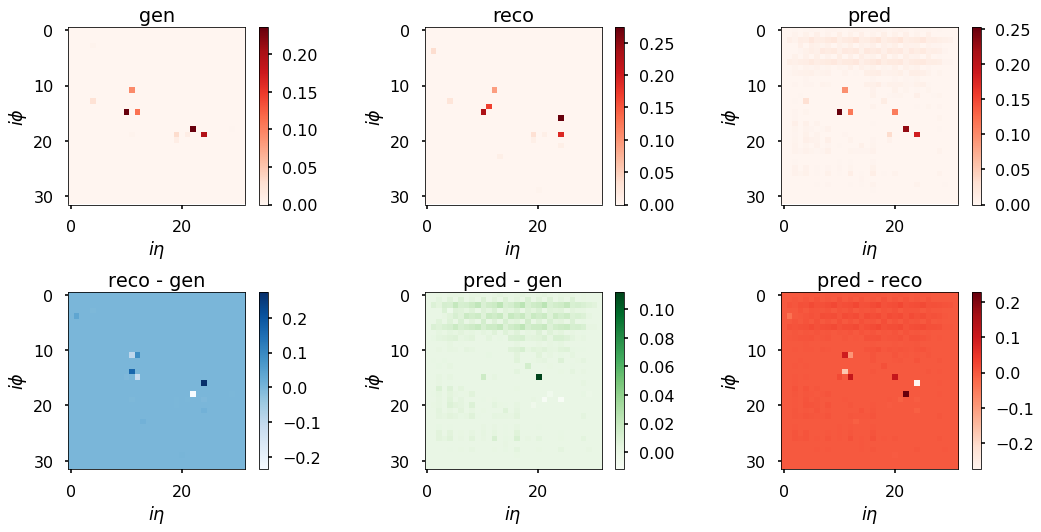

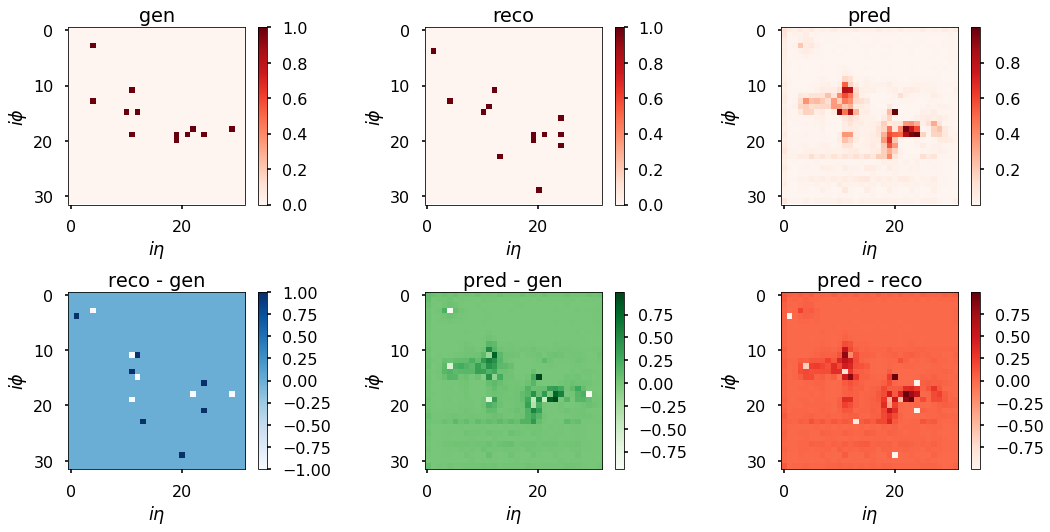

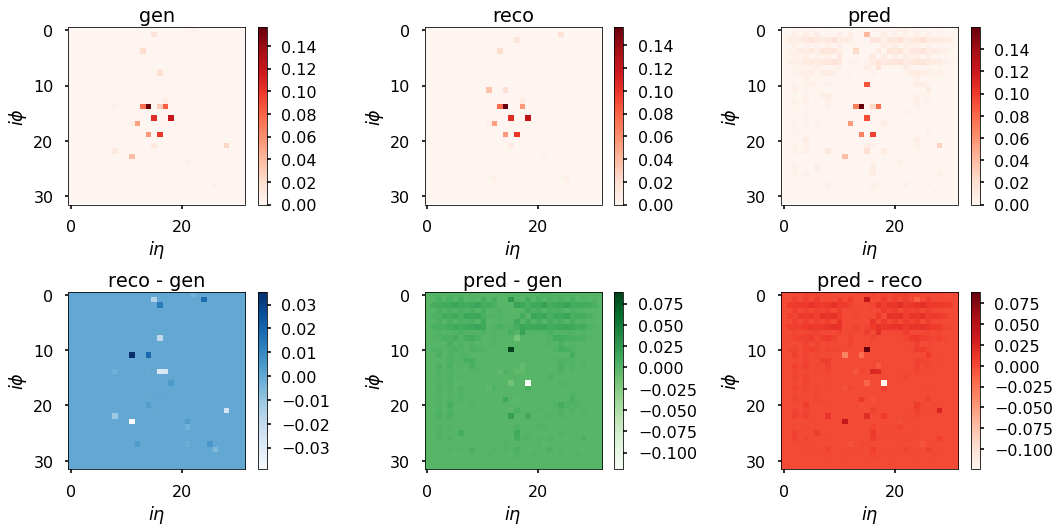

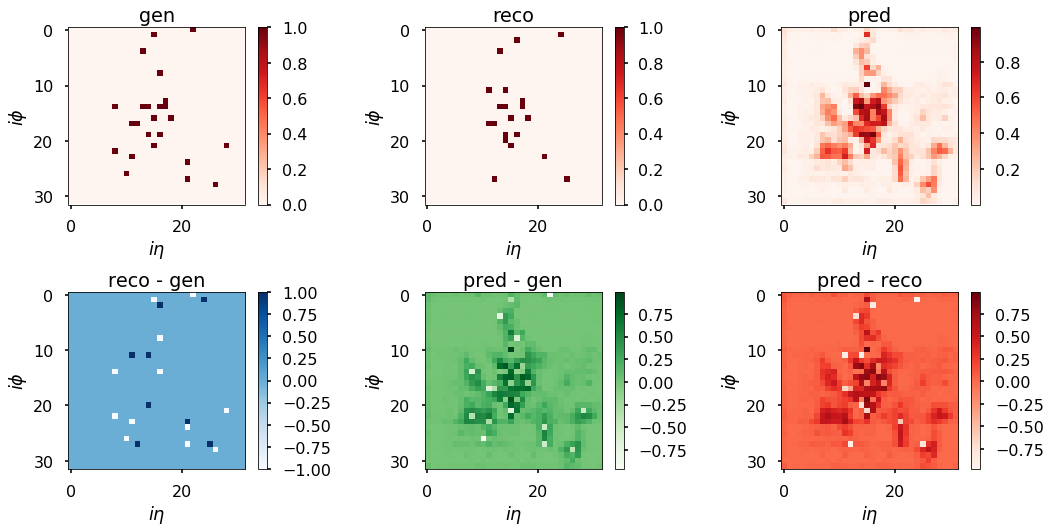

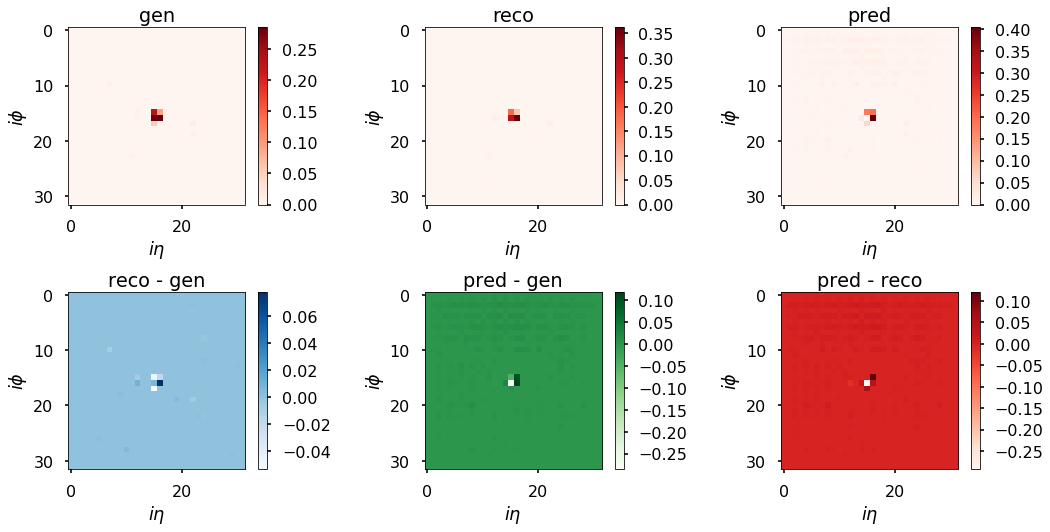

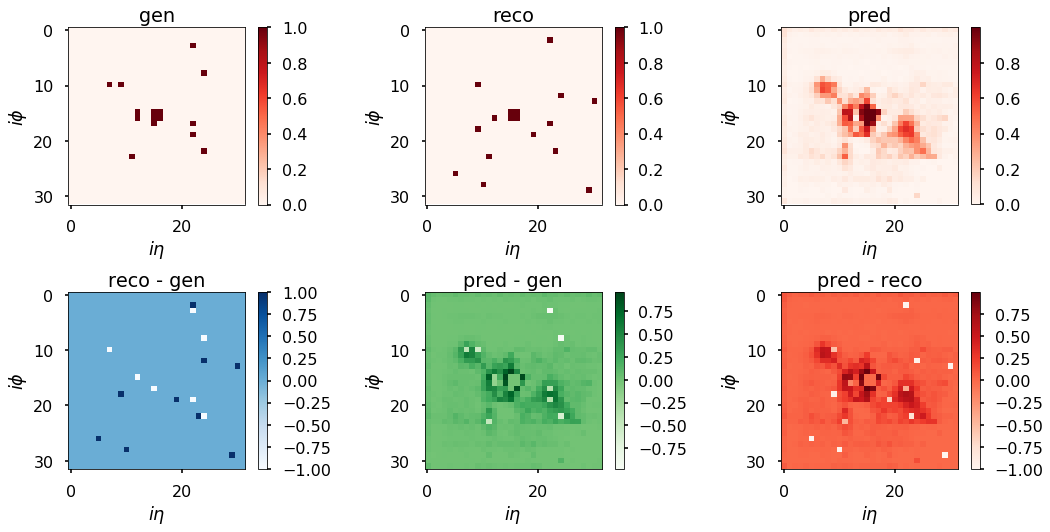

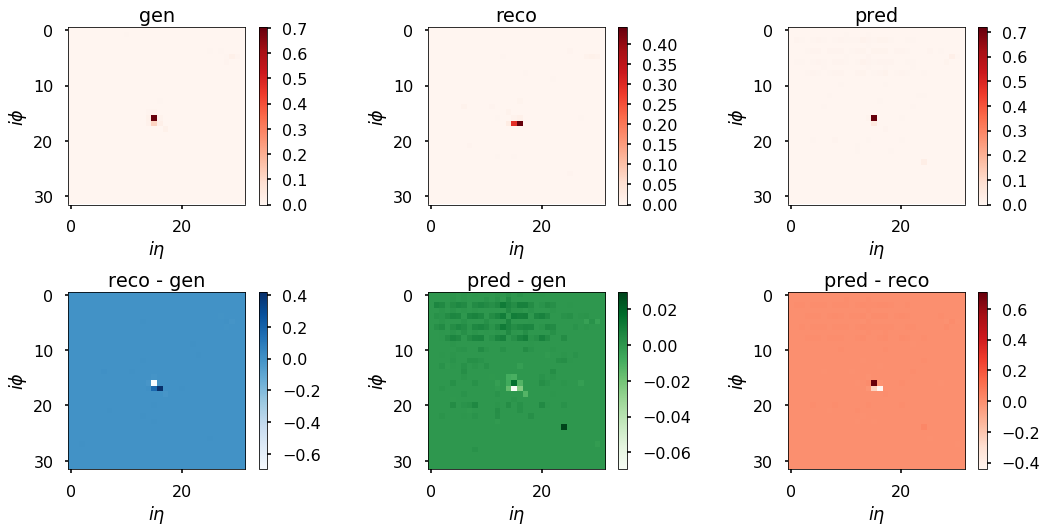

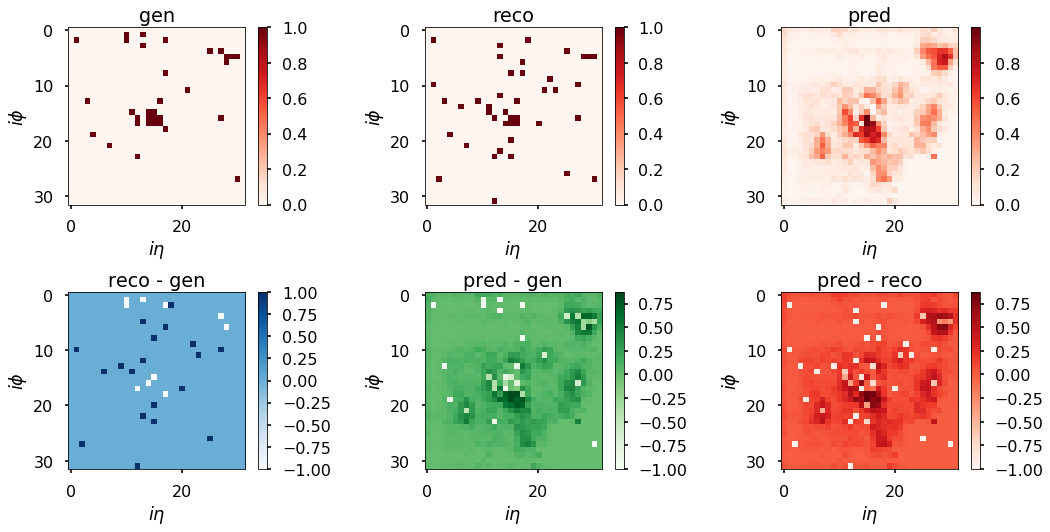

In [23]:
reload(plotting)

sample = np.random.choice(np.arange(0,y_pred_val.shape[0]),4)

for img in sample:
    plotting.show_prediction(img,X_unnorm[:,:32,:32],y_test[:,:32,:32],y_pred_val)
    plt.show()
    plt.savefig('%s/jet_pred_val_%d.png' % (plots_folder,img))
    if y_pred_prob is not None:
        plotting.show_prediction(img,np.greater(X_unnorm[:,:32,:32],0.).astype(np.float32),np.greater(y_test[:,:32,:32],0.).astype(np.float32),y_pred_prob)
        plt.savefig('%s/jet_pred_mask_%d.png' % (plots_folder,img))
        plt.show()

In [24]:
def generate_jets(pred_val,pred_prob,rescale=True):
    pred = pred_val*(np.random.uniform(size=pred_val.shape) < pred_prob)
    if rescale:
        pred_scl = np.sum(pred_val*pred_prob,axis=(1,2),keepdims=True)/np.sum(pred,axis=(1,2),keepdims=True)
        pred *= pred_scl
    return pred

gen = X_unnorm[:y_pred_val.shape[0],:32,:32,:]
reco = y_test[:y_pred_val.shape[0],:32,:32,:]
if y_pred_prob is not None:
    pred_noscl  = generate_jets(y_pred_val,y_pred_prob,False)
    pred  = generate_jets(y_pred_val,y_pred_prob,False)
    pred1 = generate_jets(y_pred_val,y_pred_prob,False)
    pred2 = generate_jets(y_pred_val,y_pred_prob,False)
    pred3 = generate_jets(y_pred_val,y_pred_prob,False)
    pred4 = generate_jets(y_pred_val,y_pred_prob,False)
else:
    pred = y_pred_val
    pred_noscl = pred


16240


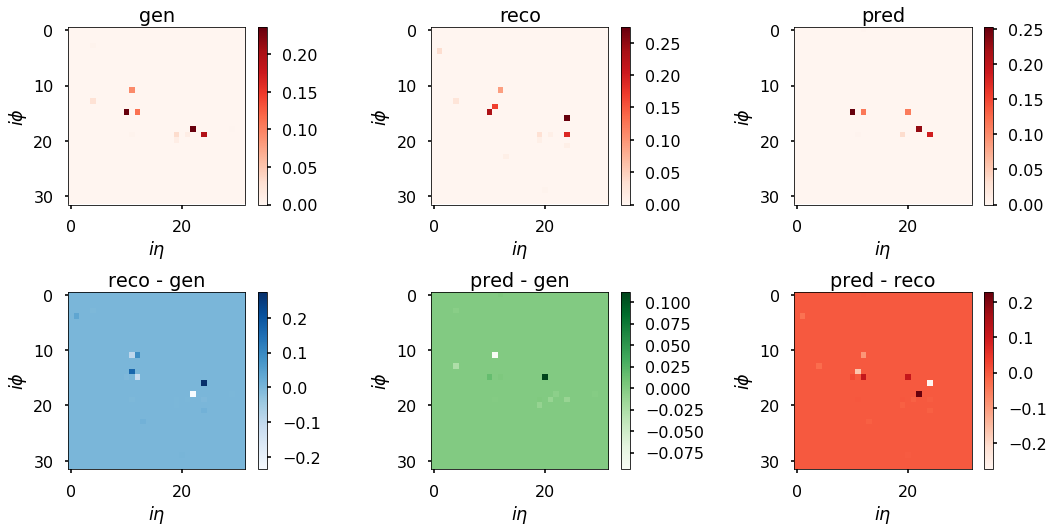

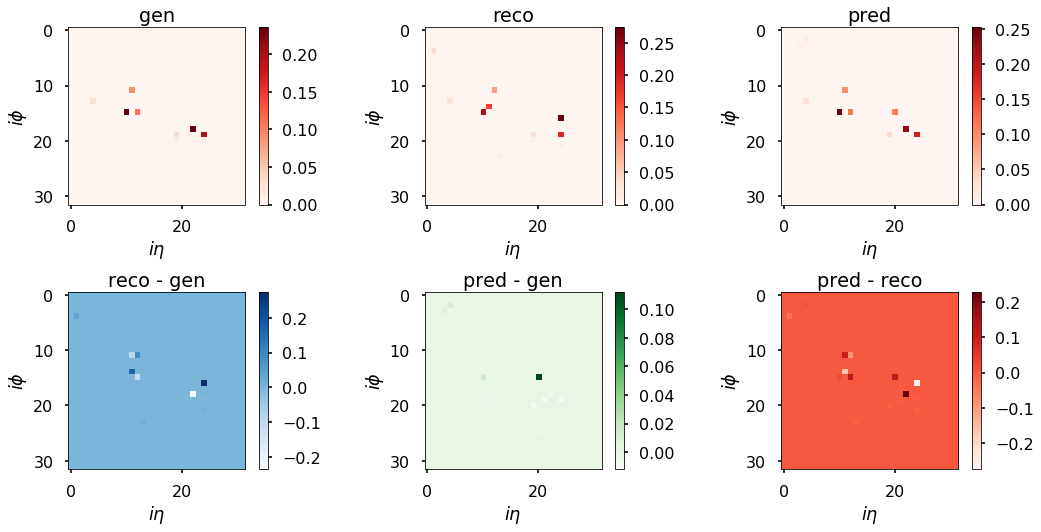

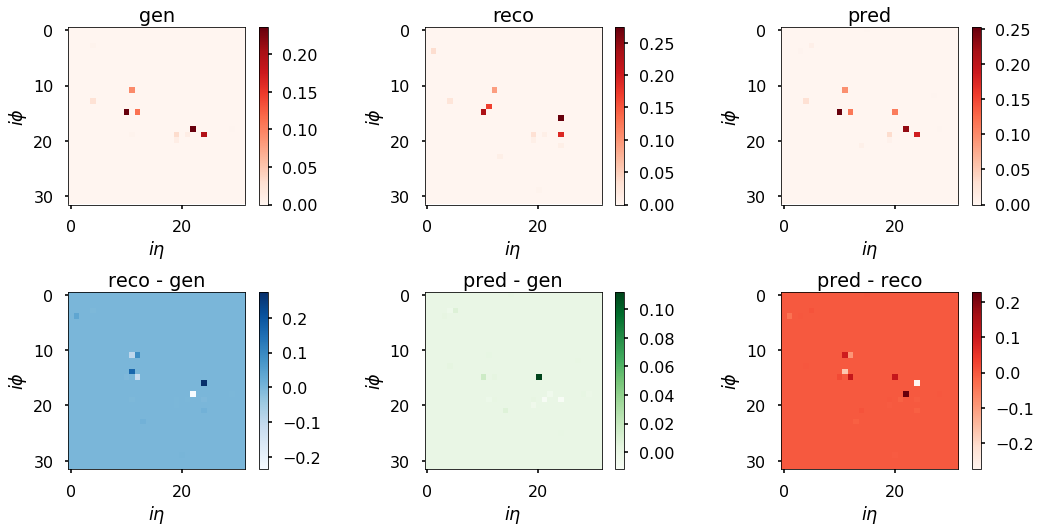

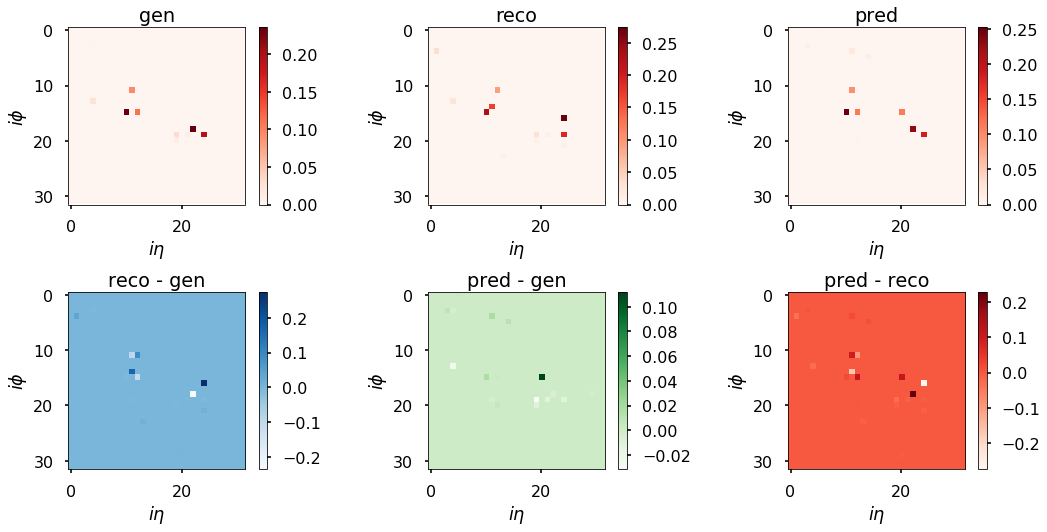

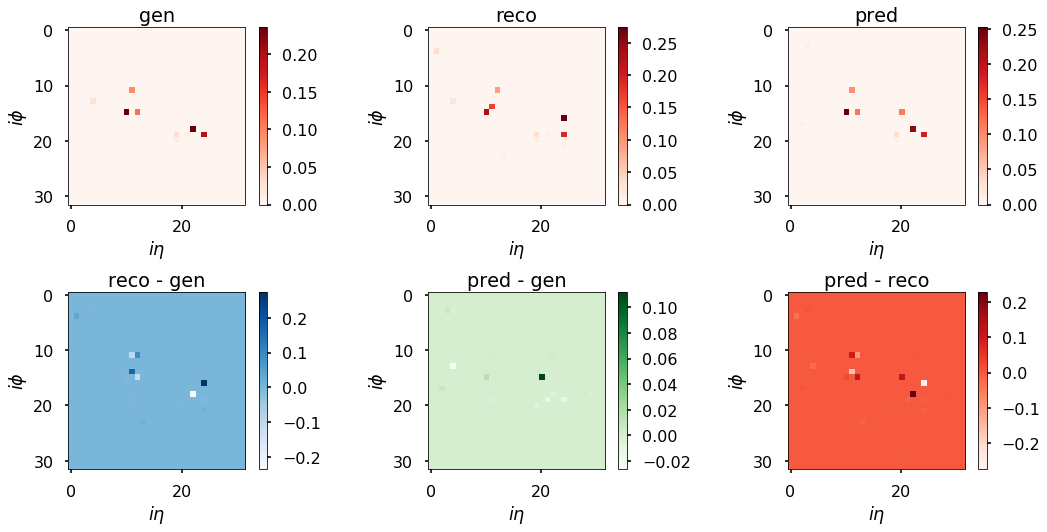

44530


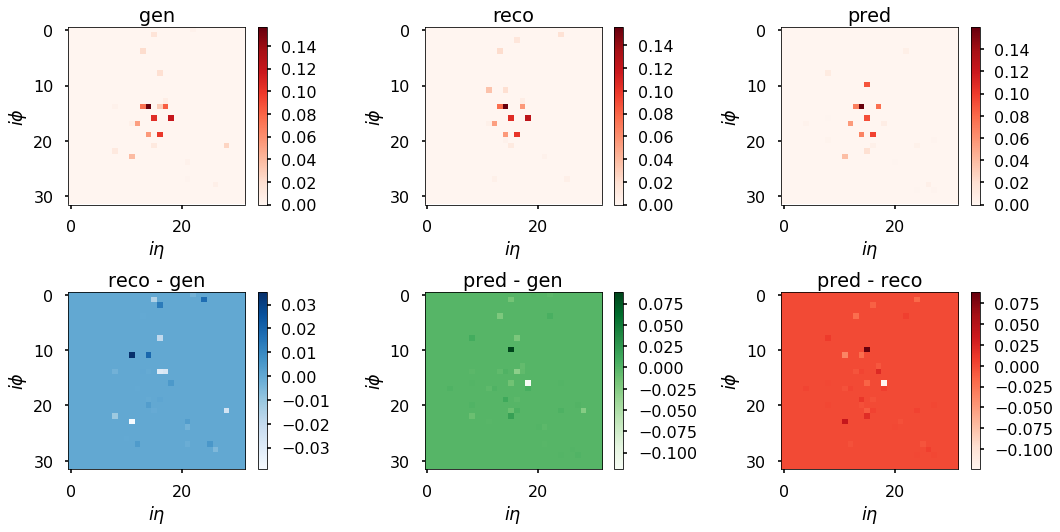

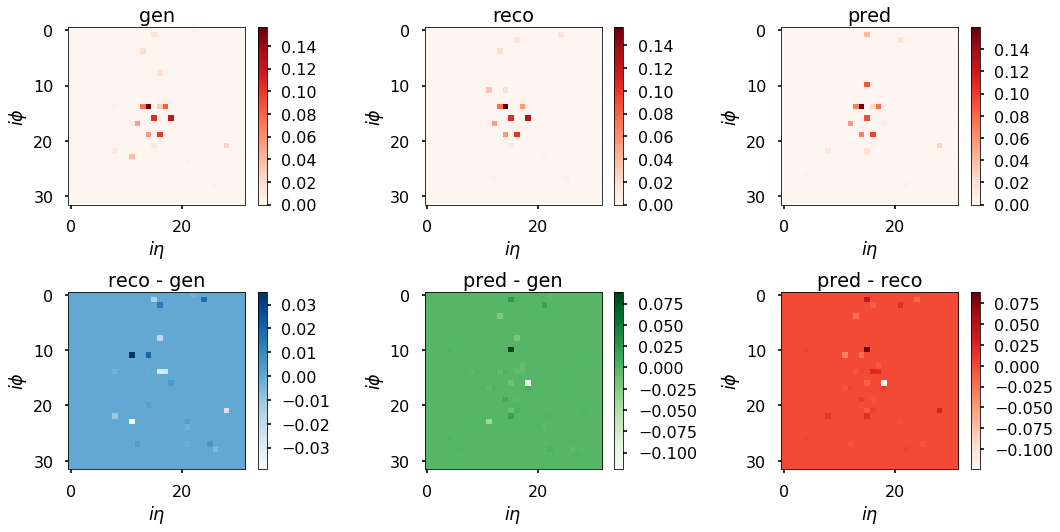

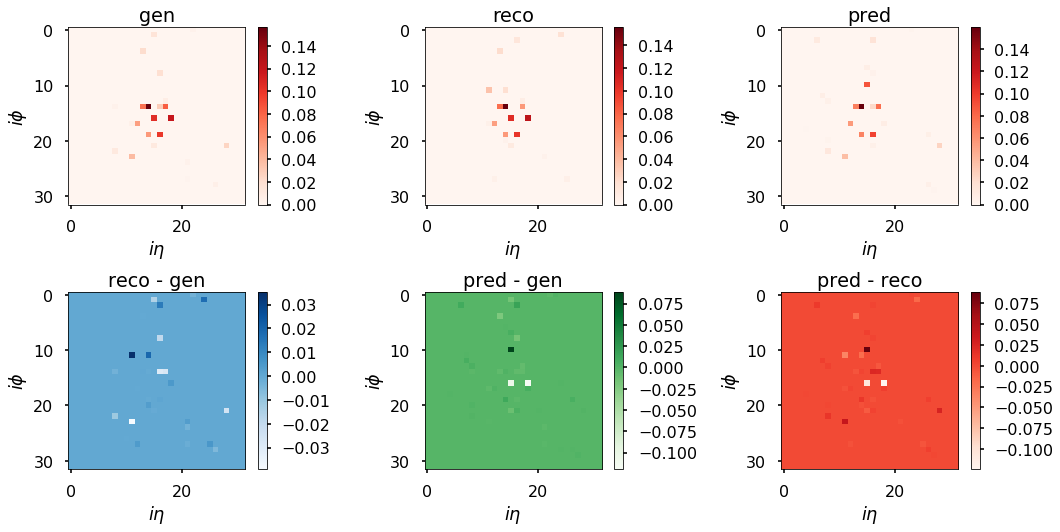

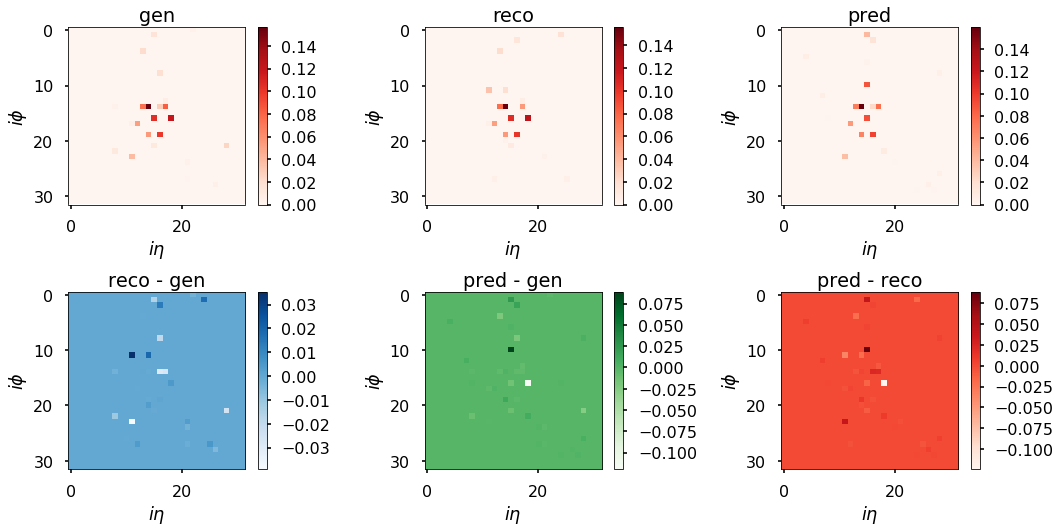

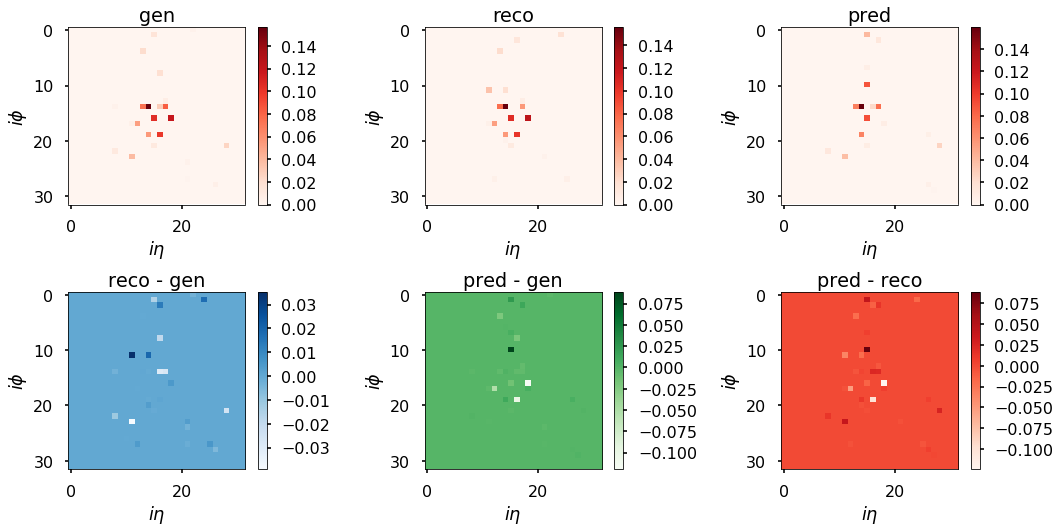

24636


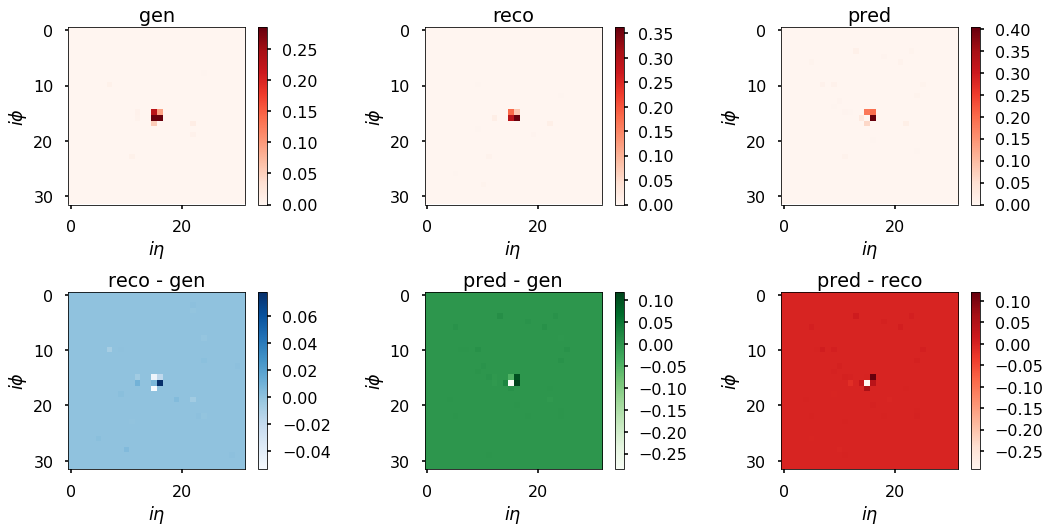

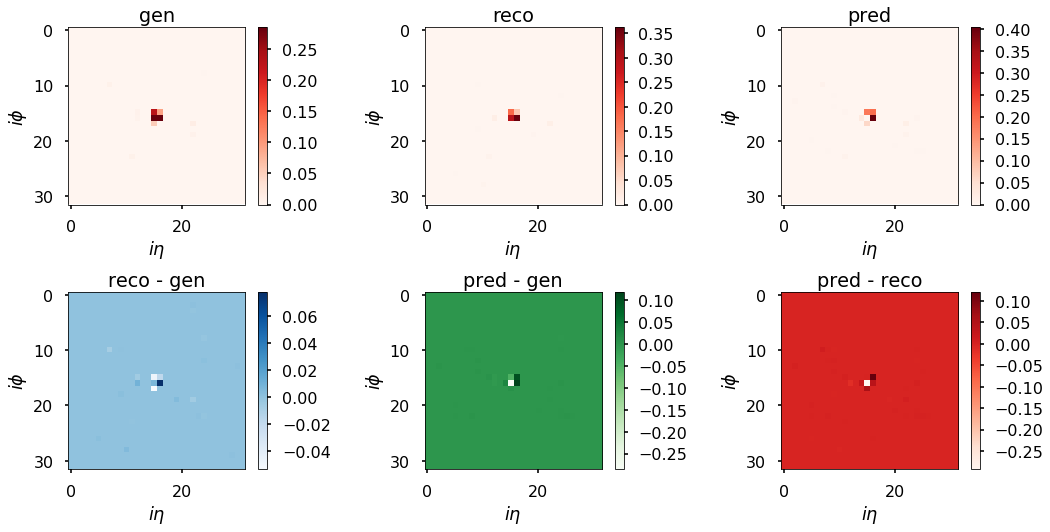

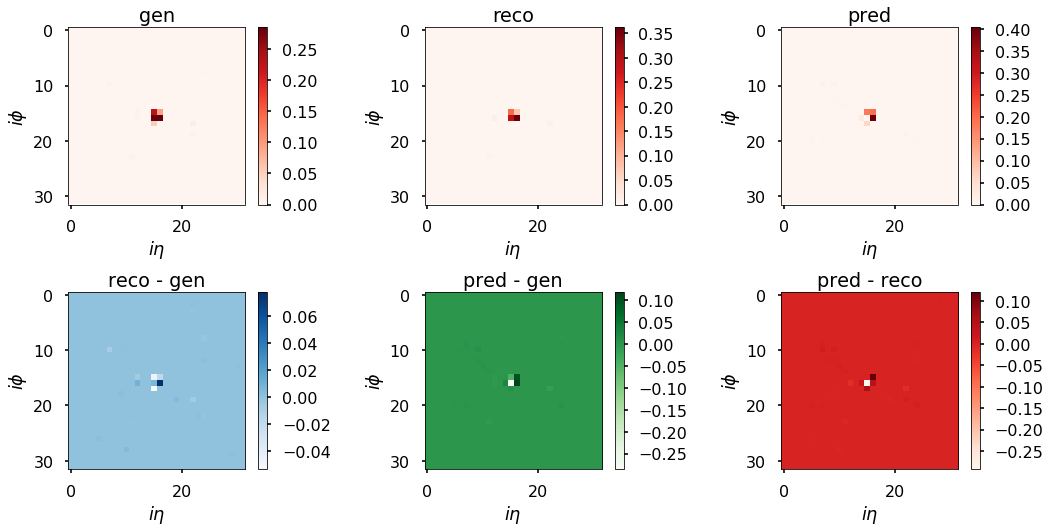

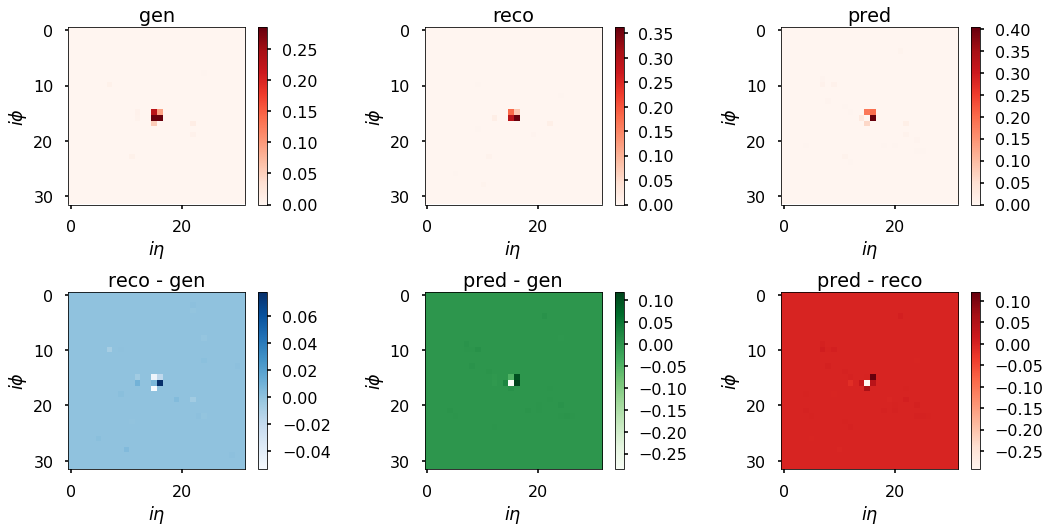

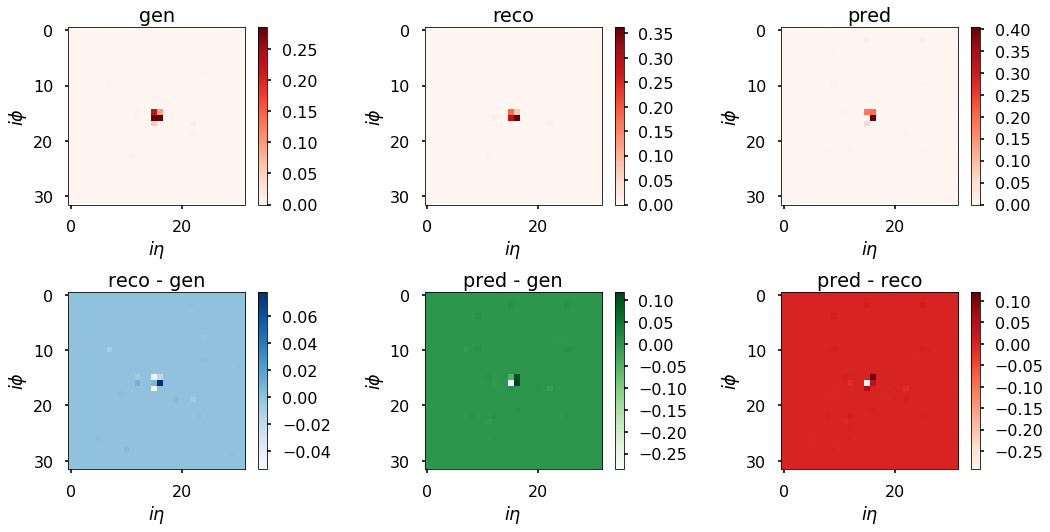

44635


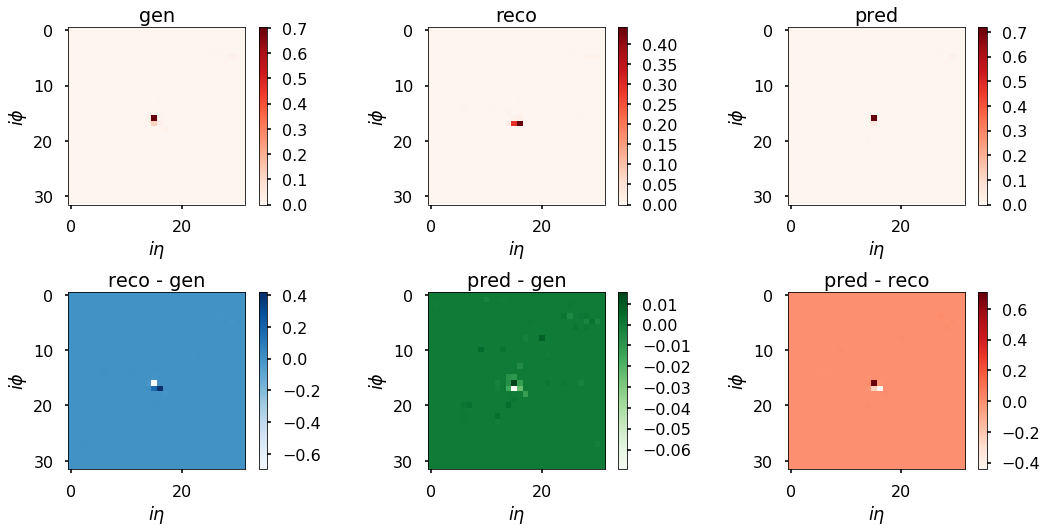

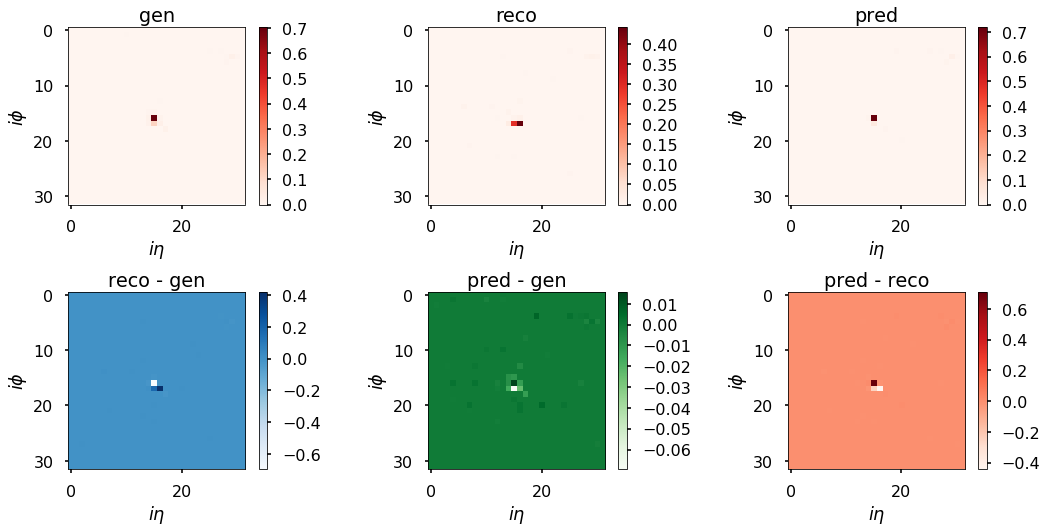

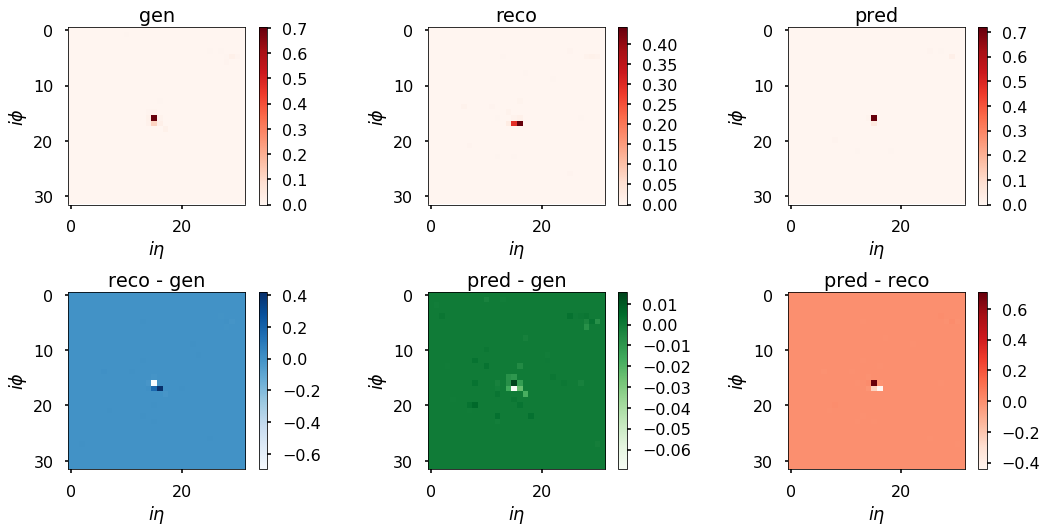

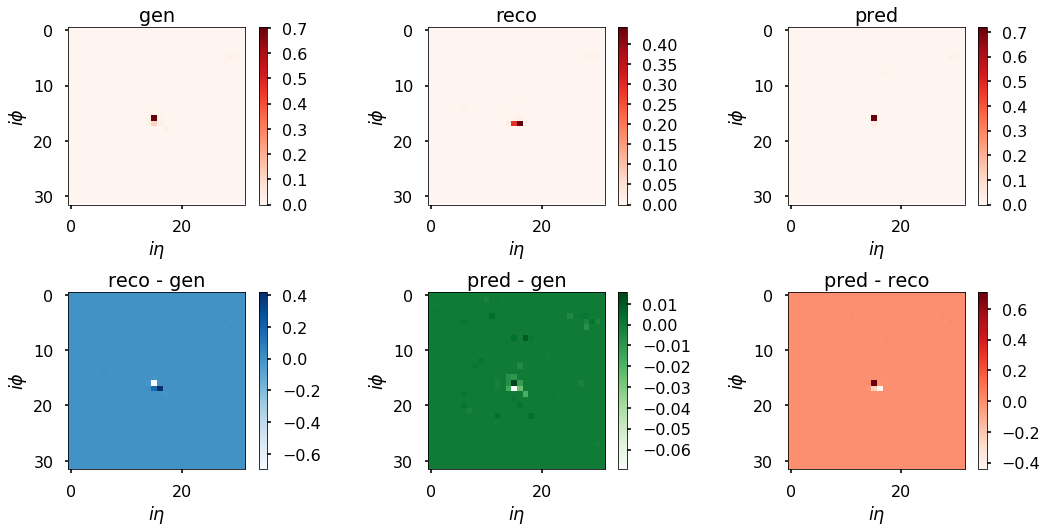

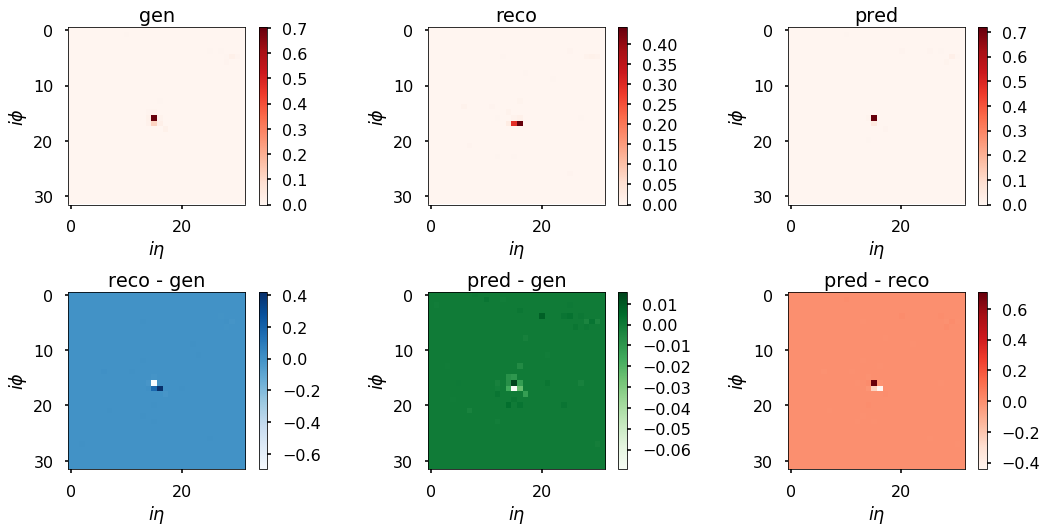

In [25]:
if y_pred_prob is not None:
    for img in sample:
        print(img)
        if y_pred0 is not None:
            plotting.show_prediction(img,gen,reco,y_pred0)
            plt.savefig('%s/jet_pred0_%d.png' % (plots_folder,img))
            plt.show()            
        for ip,ipred in enumerate([pred1,pred2,pred3,pred4]):
            plotting.show_prediction(img,gen,reco,ipred)
            plt.savefig('%s/jet_pred%d_%d.png' % (plots_folder,ip+1,img))
            plt.show()

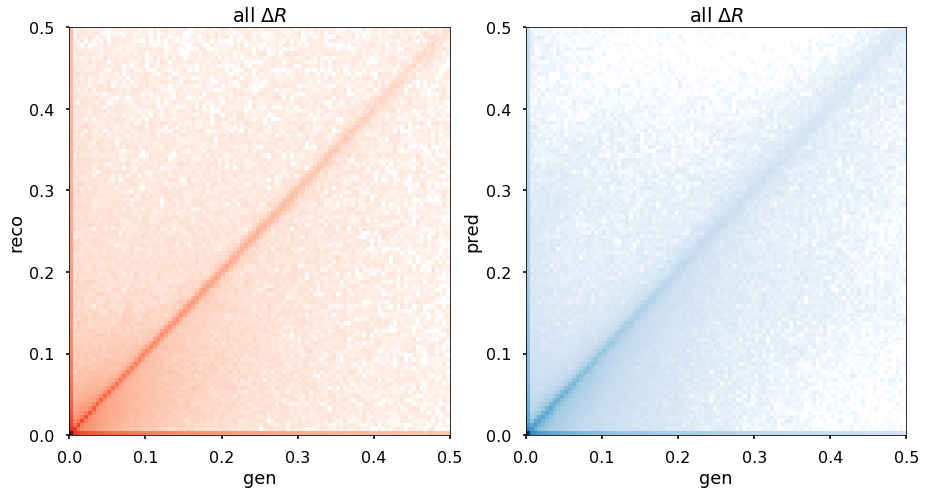

In [26]:
from matplotlib.colors import LogNorm 

# print(pred.dtype,reco.d)

reload(plotting)
plotting.scatter_pred(gen,reco,pred,None,title='all $\Delta R$',rng=[0,0.5])
plt.savefig('%s/scatter_pred.png' % plots_folder)

In [27]:
rings, ring_masks = plotting.make_masks([0.3, 0.2, 0.15, 0.1, 0.05, 0.],npix=IMG_SIZE/2,rad=0.3*IMG_SIZE/32.)

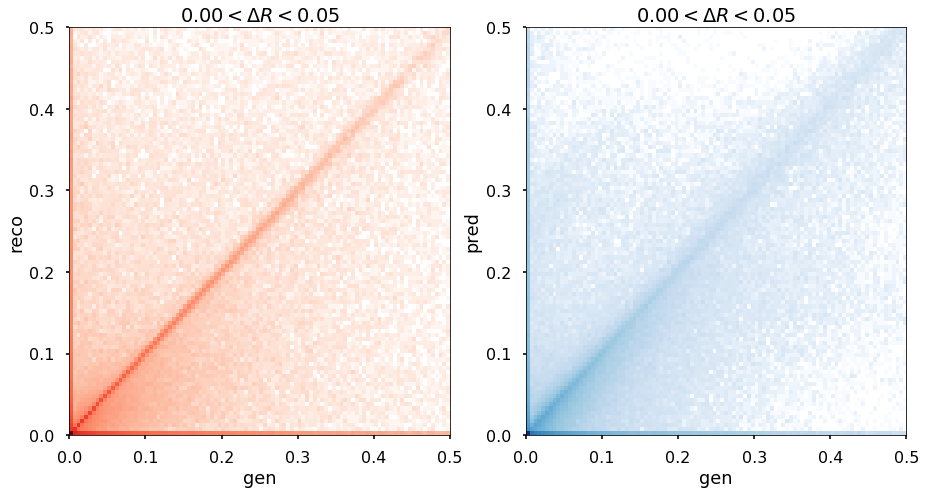

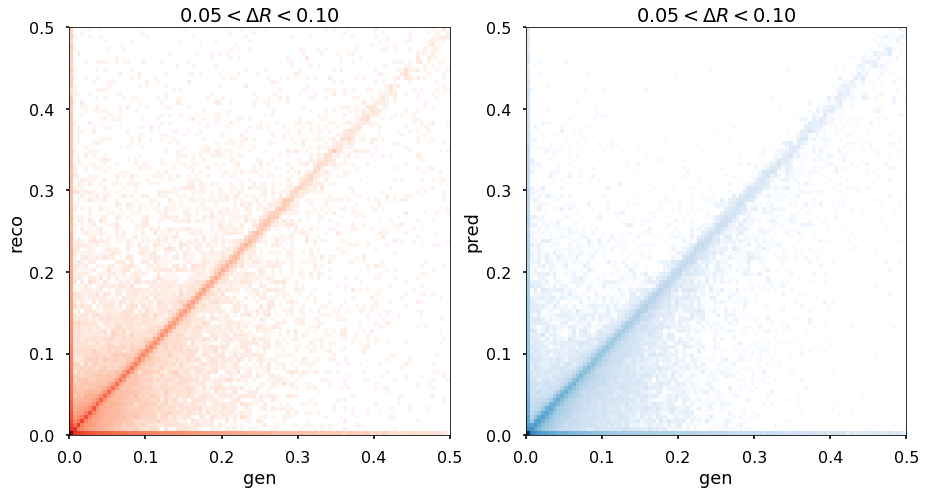

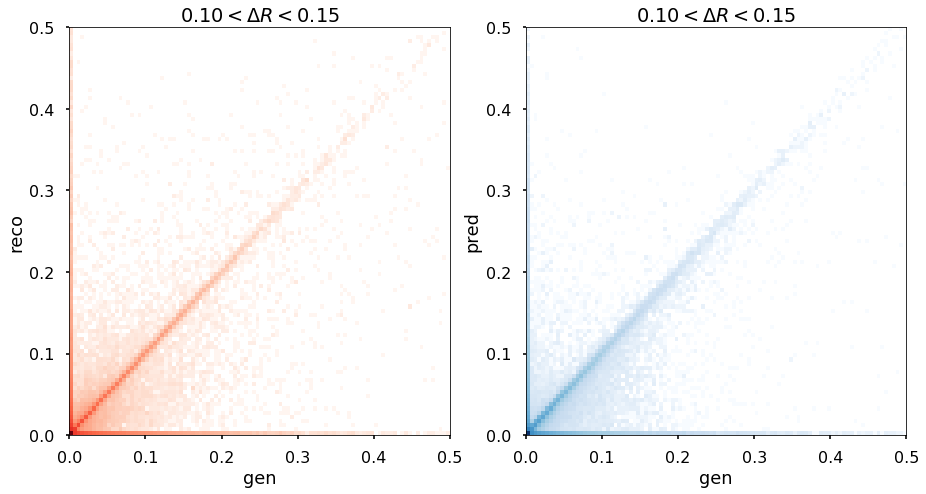

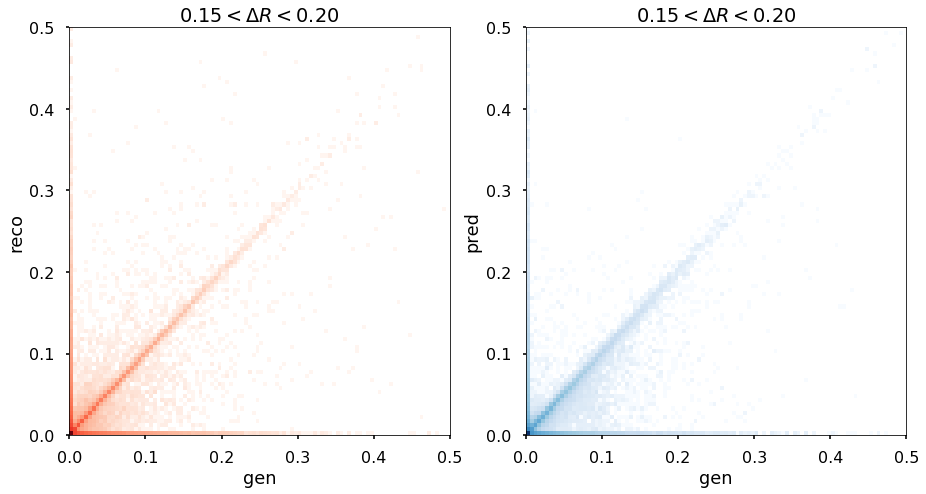

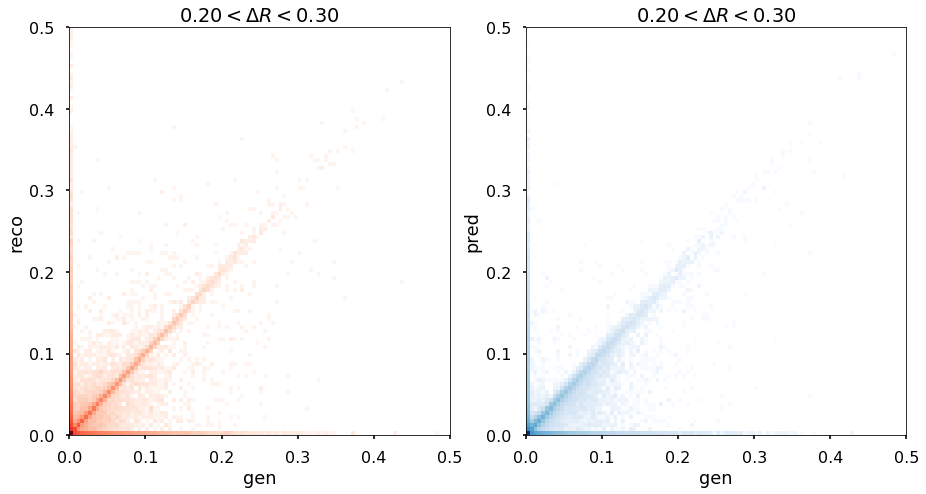

In [28]:
for iring,(ring,mask) in enumerate(zip(rings,ring_masks)):
    plotting.scatter_pred(gen,reco,pred,mask,title="$%1.2f < \Delta R < %1.2f$" % ring, rng=[0.,0.5] )
    plt.savefig('%s/scatter_pred_%d.png' % (plots_folder, iring ) )

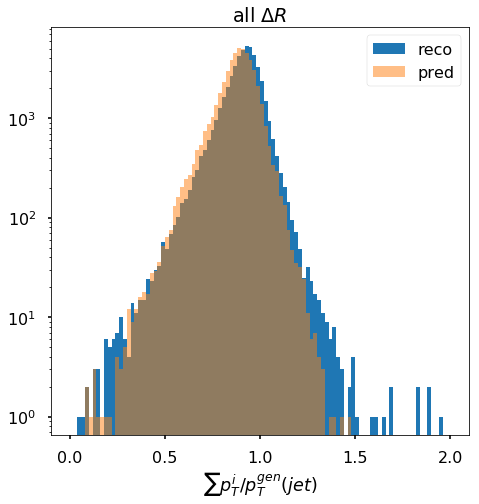

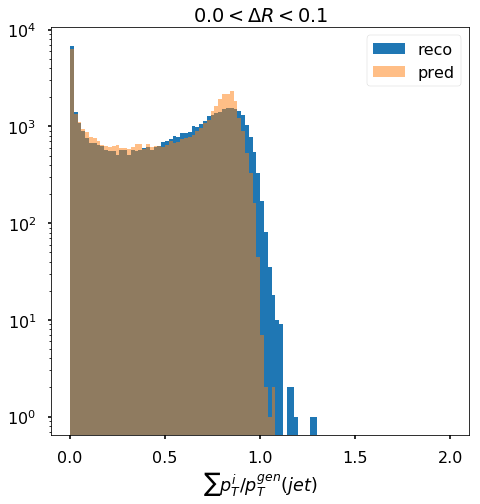

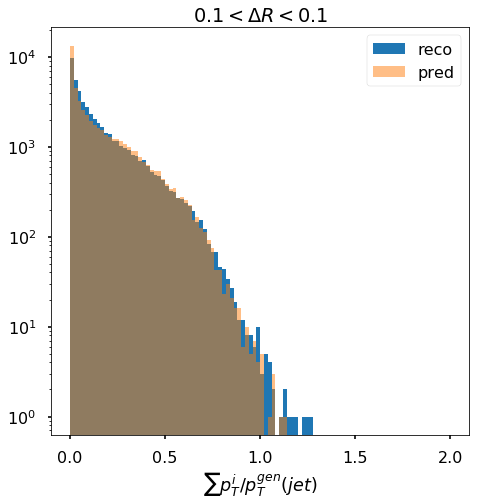

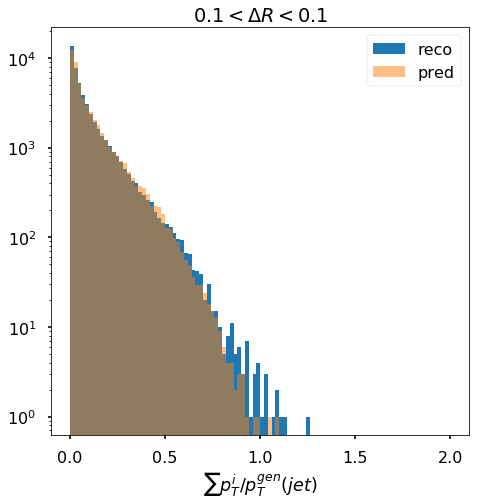

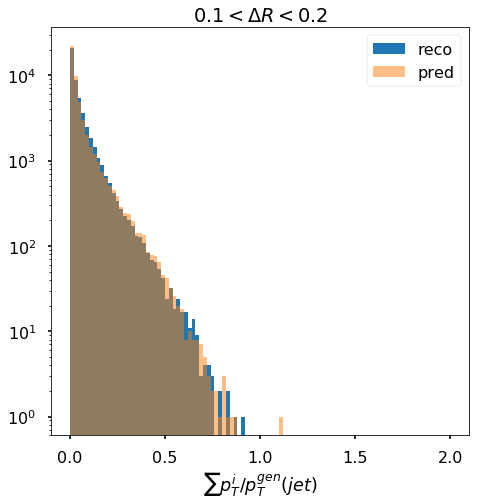

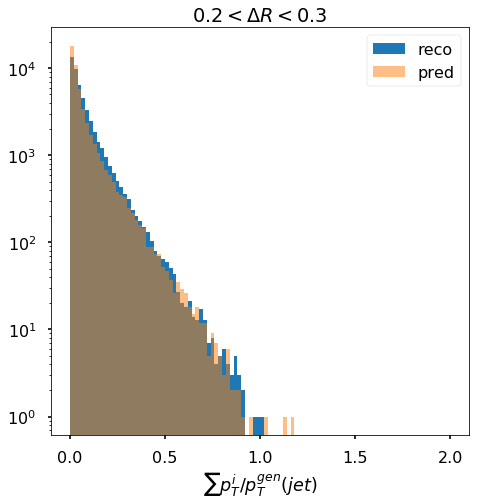

In [29]:
plotting.distrib_pred(gen,reco,pred_noscl,title='all $\Delta R$')
plt.savefig('%s/sum_pred.png' % plots_folder)
for iring,(ring,mask) in enumerate(zip(rings,ring_masks)):
    plotting.distrib_pred(gen,reco,pred_noscl,mask,title="$%1.1f < \Delta R < %1.1f$" % ring )
    plt.savefig('%s/sum_pred_%d.png' % (plots_folder, iring ) )

In [30]:
if len(inputs_test) == 2:
    cond = inputs_test[1][:pred.shape[0]]
else:
    cond = inputs_test[2][:pred.shape[0]]
weights = w_test[:pred.shape[0]]

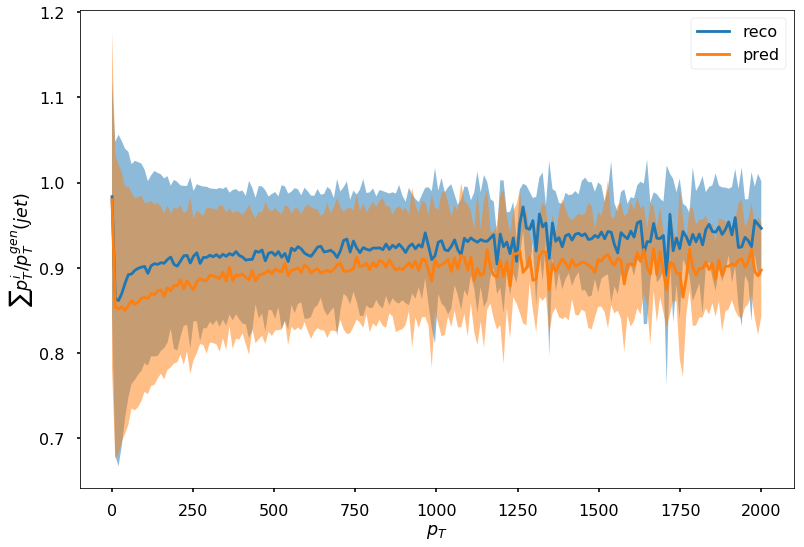

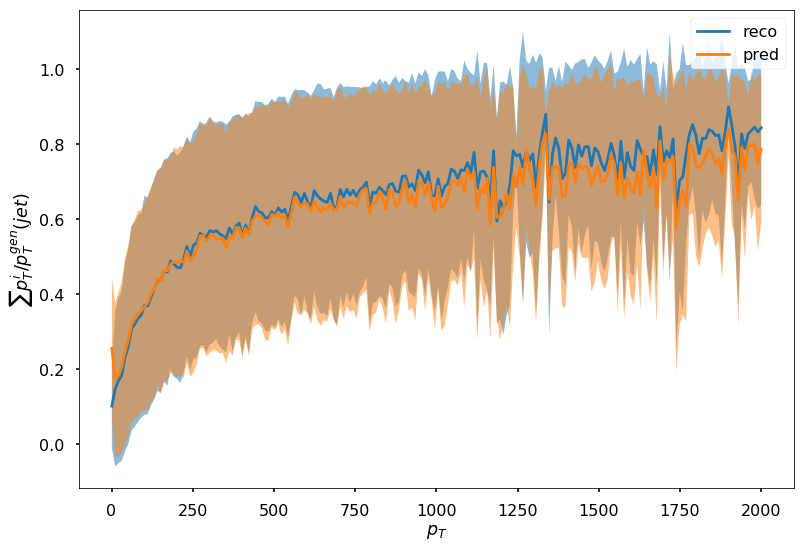

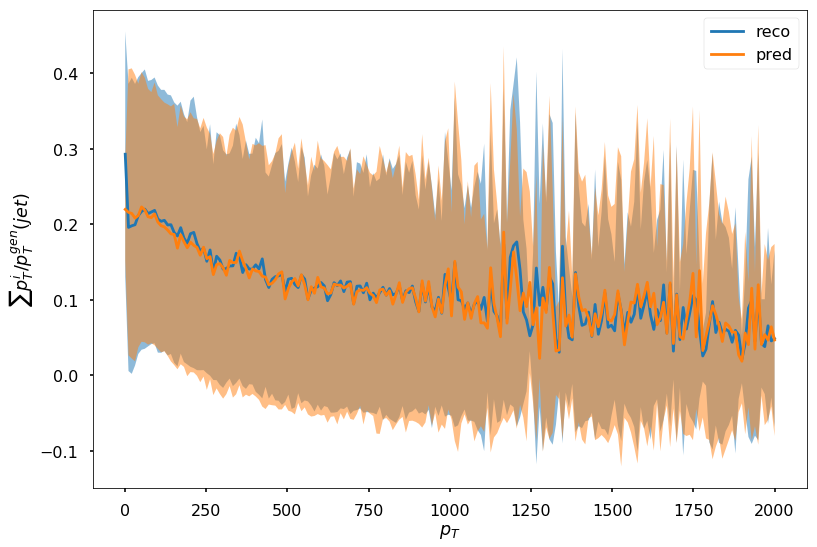

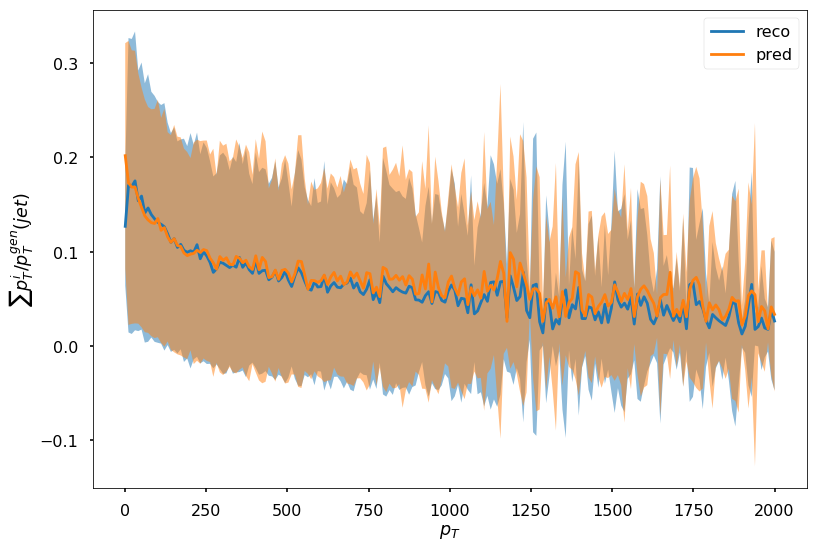

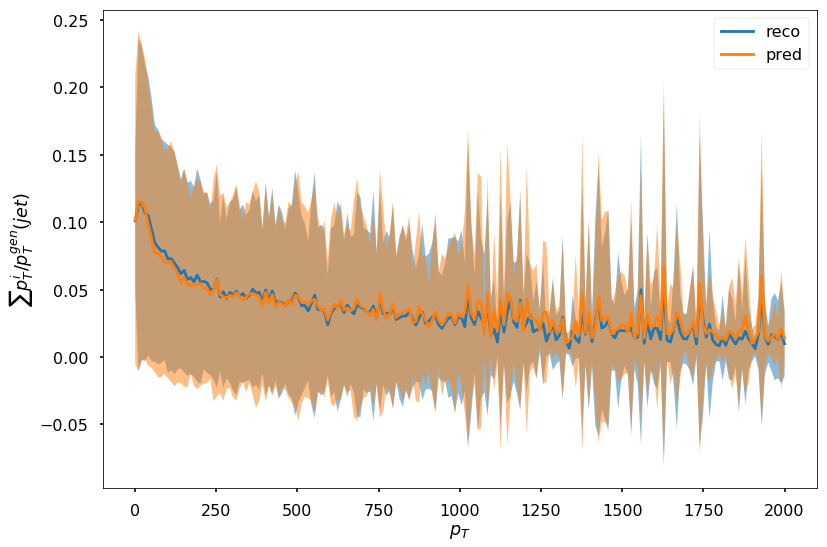

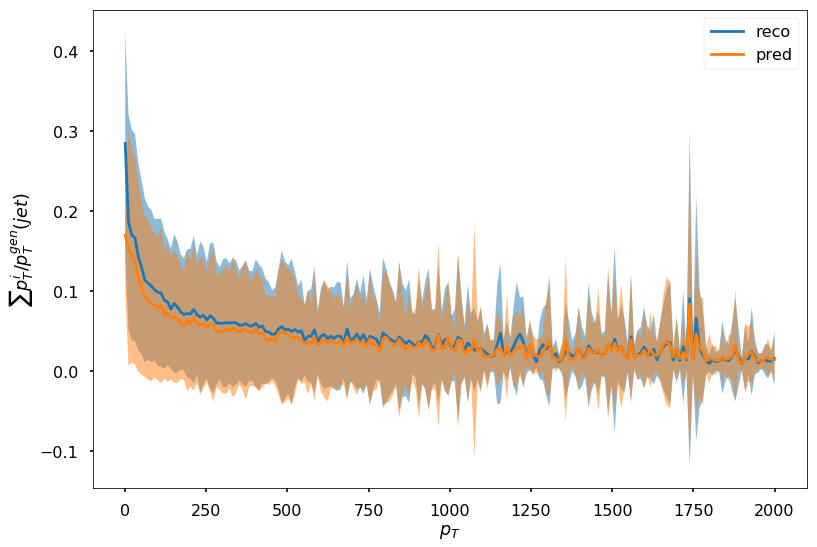

In [31]:
plotting.show_moments(reco,pred_noscl,cond[:,0,0],np.linspace(1,2000,200),xlabel='$p_T$',weights=weights)
plt.savefig('%s/pt_dep_pred.png' % plots_folder)
plt.show()
for iring,(ring,mask) in enumerate(zip(rings,ring_masks)):
    #distrib_pred(gen,reco,pred,mask)
    plotting.show_moments(reco,pred_noscl,cond[:,0,0],np.linspace(1,2000,200),mask=mask,xlabel='$p_T$',weights=weights)
    plt.savefig('%s/pt_dep_pred_%d.png' % (plots_folder,iring) )
    plt.show()

In [32]:
# import ROOT as RT

# import sys
# reload(plotting)
# def run_substructure(imgs,pts,etas,phis,rad=0.3):
#     print("aaaaaaaaaaaa",file=sys.stderr)
#     RT.gSystem.Load("./ganja/SubstructureComputer_C.so")
#     cmpt = RT.SubstructureComputer()
#     print("aaaaaaaaaaaa",file=sys.stderr)

#     npix = imgs.shape[1]/2
#     imeta, imphi = plotting.make_grid(npix,rad)
#     print("aaaaaaaaaaaa",file=sys.stderr)

#     ## print(imeta)
#     ## print(imphi)
#     metrics = []
#     for im in range(imgs.shape[0]):
#         print("bbbbbbbbbbbbbb", im,file=sys.stderr)
#         p4 = plotting.img2p4( imgs[im]*pts[im], imeta+etas[im], imphi+phis[im] )
#         print("bbbbbbbbbbbbbb", im,file=sys.stderr)
#         cmpt( p4[0].shape[-1], *p4 )
#         print("bbbbbbbbbbbbbb", im,file=sys.stderr)
        
#     ###     metrics.append( [cmpt.ptD, cmpt.axis1, cmpt.axis2, cmpt.tau21, cmpt.tau1, cmpt.tau2, cmpt.tau3] )
#     ### return np.array(metrics)## , dtype=[('ptD',np.float32),


In [33]:
reload(plotting)

pts = cond[:,0,0]
etas = cond[:,0,1]
phis = cond[:,0,2]

# os.environ['LD_LIBRARY_PATH'] = "/users/musella/my-env/lib:"+os.environ['LD_LIBRARY_PATH']
nj = pred_noscl.shape[0]
steps = 200
## nj = 10 # pred_noscl.shape[0]
##steps = 1
sub_reco = plotting.compute_substructure(y_test[:nj,:32,:32],pts[:nj],etas[:nj],phis[:nj],steps=steps)
sub_pred = plotting.compute_substructure(pred_noscl[:nj,:32,:32],pts[:nj],etas[:nj],phis[:nj],steps=steps)

[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed:    5.2s
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed:    8.8s
[Parallel(n_jobs=5)]: Done  15 tasks      | elapsed:   12.8s
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:   19.9s
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   27.1s
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   31.6s
[Parallel(n_jobs=5)]: Done  51 tasks      | elapsed:   41.6s
[Parallel(n_jobs=5)]: Done  62 tasks      | elapsed:   49.0s
[Parallel(n_jobs=5)]: Done  75 tasks      | elapsed:   57.5s
[Parallel(n_jobs=5)]: Done  88 tasks      | elapsed:  1.1min
[Parallel(n_jobs=5)]: Done 103 tasks      | elapsed:  1.3min
[Parallel(n_jobs=5)]: Done 118 tasks      | elapsed:  1.5min
[Parallel(n_jobs=5)]: Done 135 tasks      | elapsed:  1.7min
[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:  1.9min
[Parallel(n_jobs=5)]: Done 171 tasks      | elapsed:  2.2min
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  2.4min
[Parallel(n_jobs=5)]: Do

#--------------------------------------------------------------------------
#                         FastJet release 3.3.0
#                 M. Cacciari, G.P. Salam and G. Soyez                  
#     A software package for jet finding and analysis at colliders      
#                           http://fastjet.fr                           
#	                                                                      
# Please cite EPJC72(2012)1896 [arXiv:1111.6097] if you use this package
# for scientific work and optionally PLB641(2006)57 [hep-ph/0512210].   
#                                                                       
# FastJet is provided without warranty under the terms of the GNU GPLv2.
# It uses T. Chan's closest pair algorithm, S. Fortune's Voronoi code
# and 3rd party plugin jet algorithms. See COPYING file for details.
#--------------------------------------------------------------------------
#--------------------------------------------------------------------------
#

[Parallel(n_jobs=5)]: Done 200 out of 200 | elapsed:  2.6min finished


In [34]:
tau32_reco = (sub_reco[:,6] / sub_reco[:,5]).reshape(-1,1)
tau32_pred = (sub_pred[:,6] / sub_pred[:,5]).reshape(-1,1)

sub_reco = np.concatenate([sub_reco,tau32_reco],axis=-1)
sub_pred = np.concatenate([sub_pred,tau32_pred],axis=-1)

/users/musella/my-env/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/users/musella/my-env/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [35]:
sub_reco[:,1:3] = np.exp(-sub_reco[:,1:3])
sub_pred[:,1:3] = np.exp(-sub_pred[:,1:3])
# ! rm $plots_folder/*_metric*.*

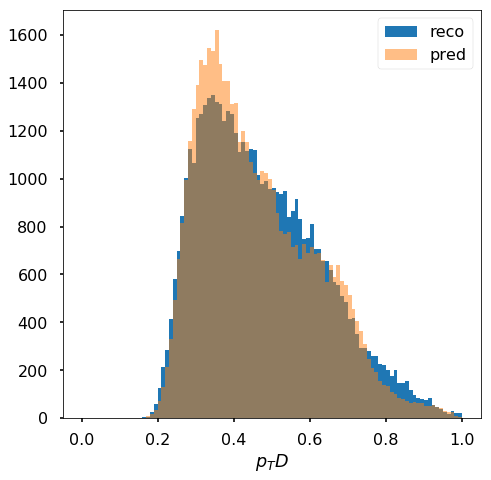

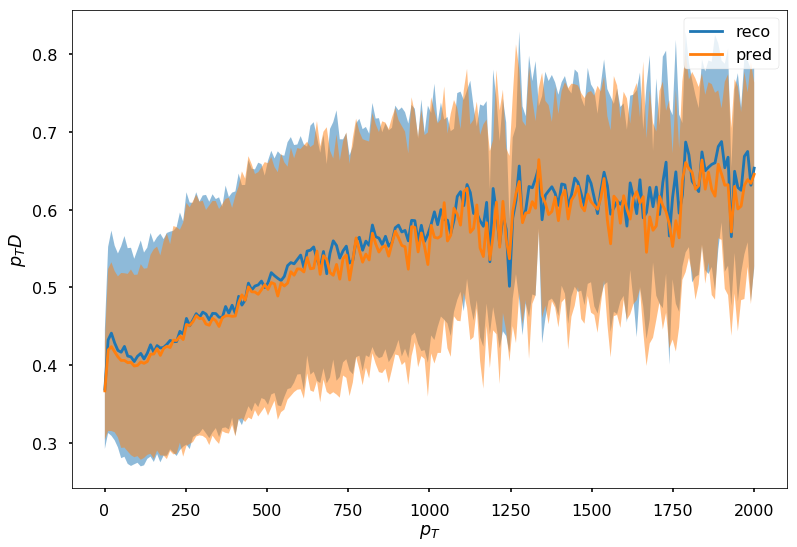

/users/musella/Ganja/GanjaPy/ganja/plotting.py:186: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 50000 but corresponding boolean dimension is 13372
  categories = categories[valid]


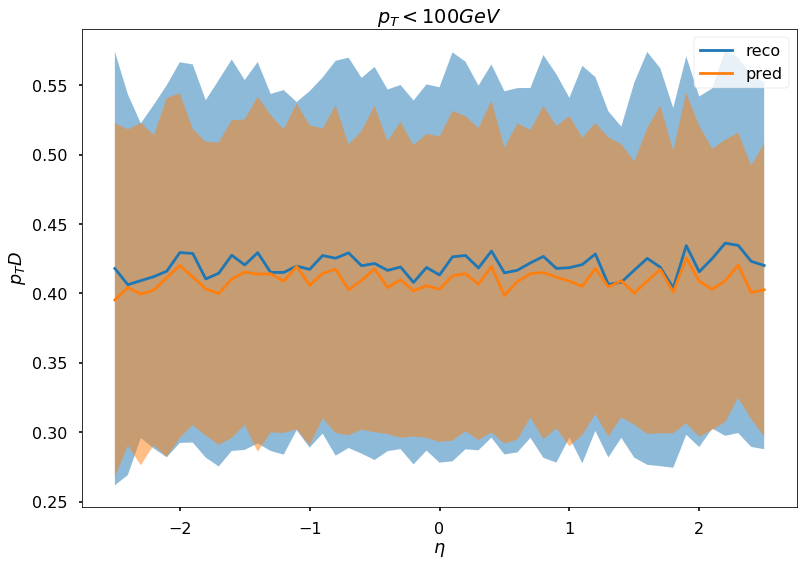

/users/musella/Ganja/GanjaPy/ganja/plotting.py:186: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 50000 but corresponding boolean dimension is 36628
  categories = categories[valid]


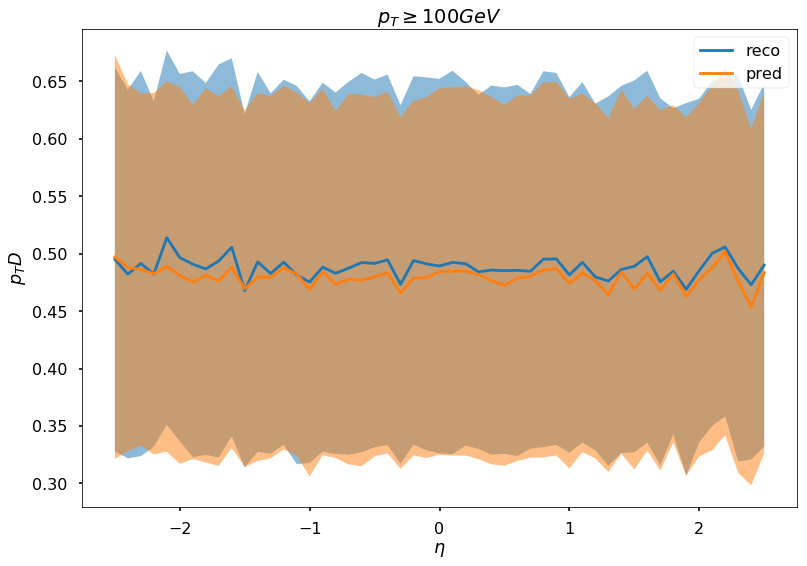

/users/musella/Ganja/GanjaPy/ganja/plotting.py:186: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 50000 but corresponding boolean dimension is 7870
  categories = categories[valid]


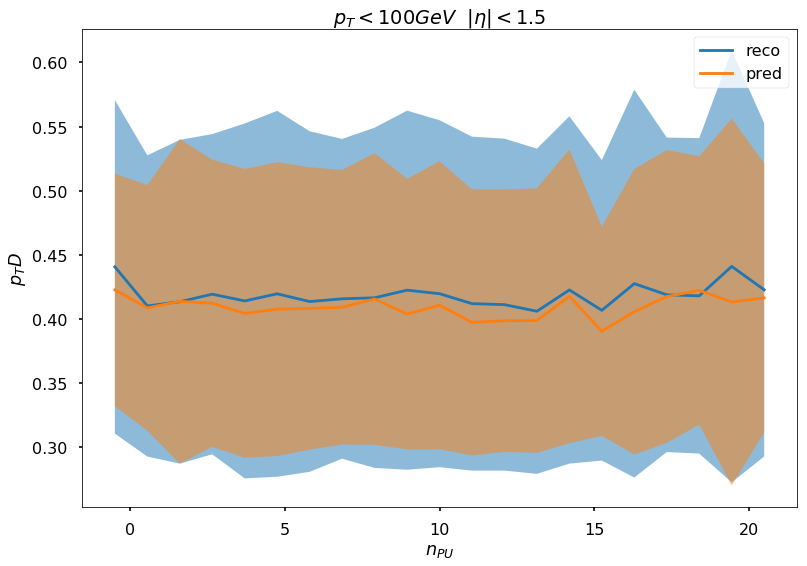

/users/musella/Ganja/GanjaPy/ganja/plotting.py:186: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 50000 but corresponding boolean dimension is 5502
  categories = categories[valid]


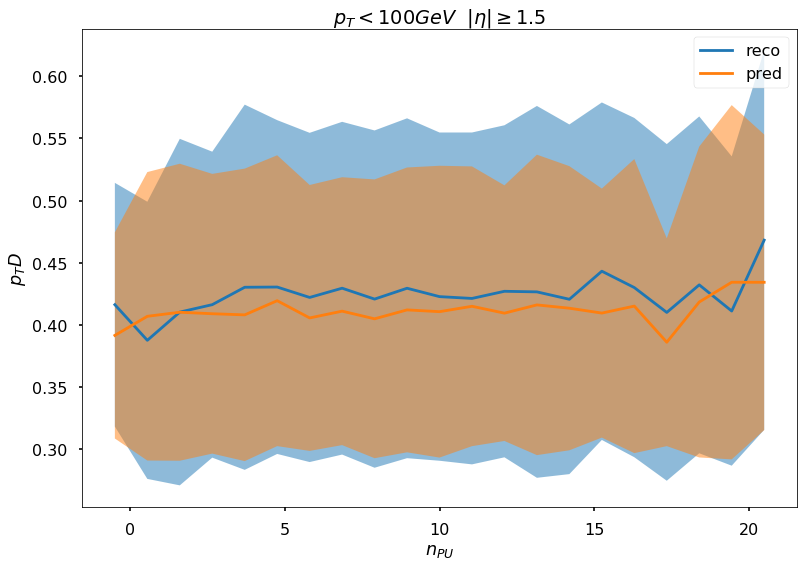

/users/musella/Ganja/GanjaPy/ganja/plotting.py:186: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 50000 but corresponding boolean dimension is 31439
  categories = categories[valid]


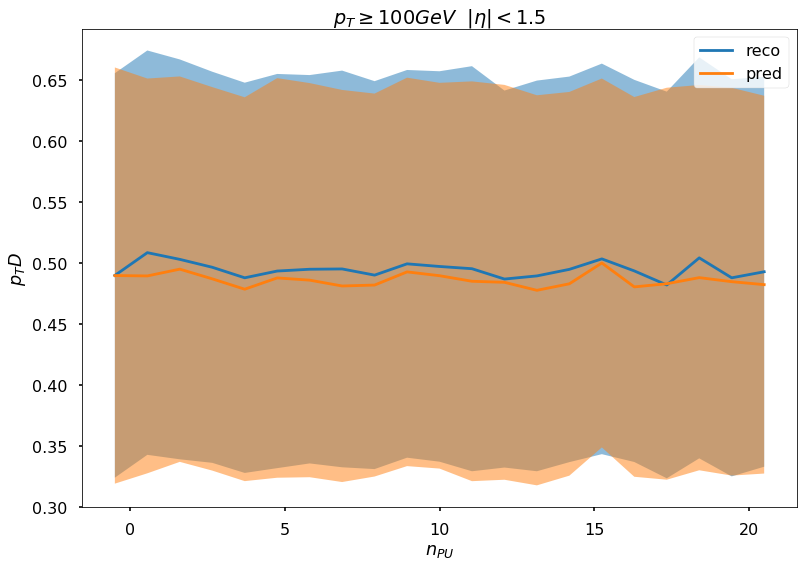

/users/musella/Ganja/GanjaPy/ganja/plotting.py:186: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 50000 but corresponding boolean dimension is 5189
  categories = categories[valid]


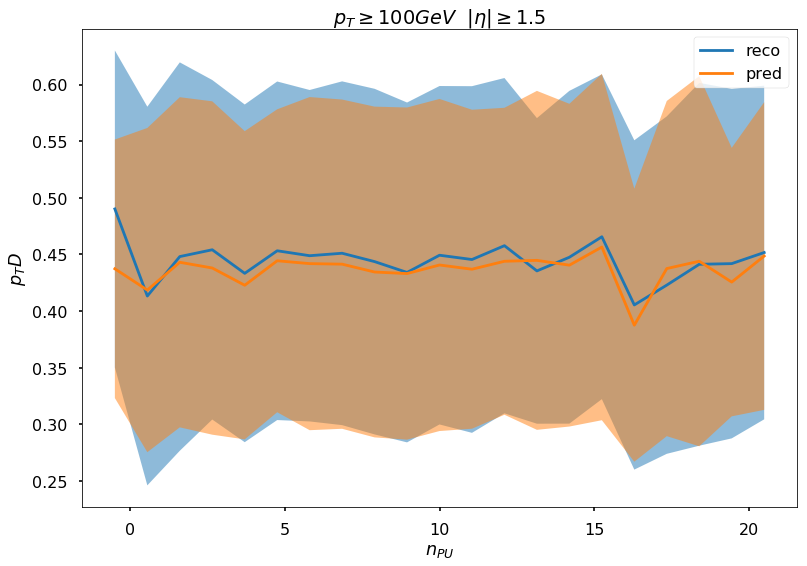

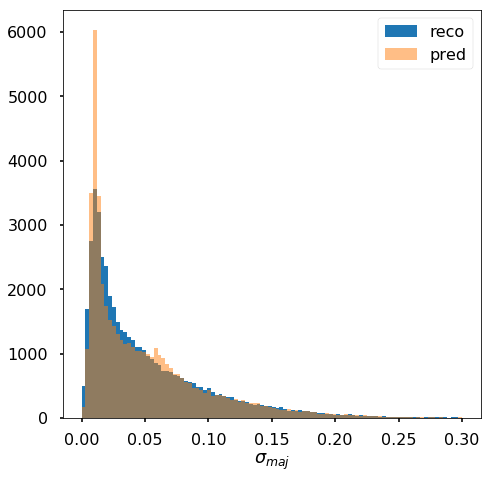

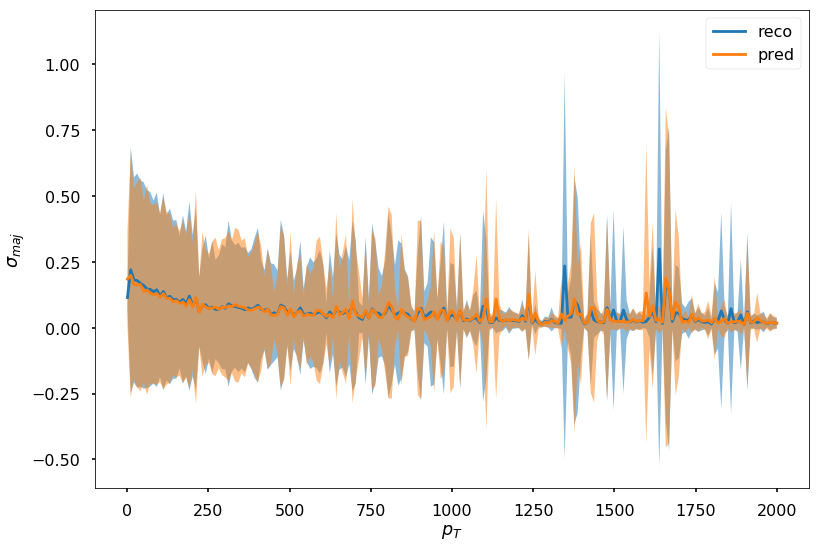

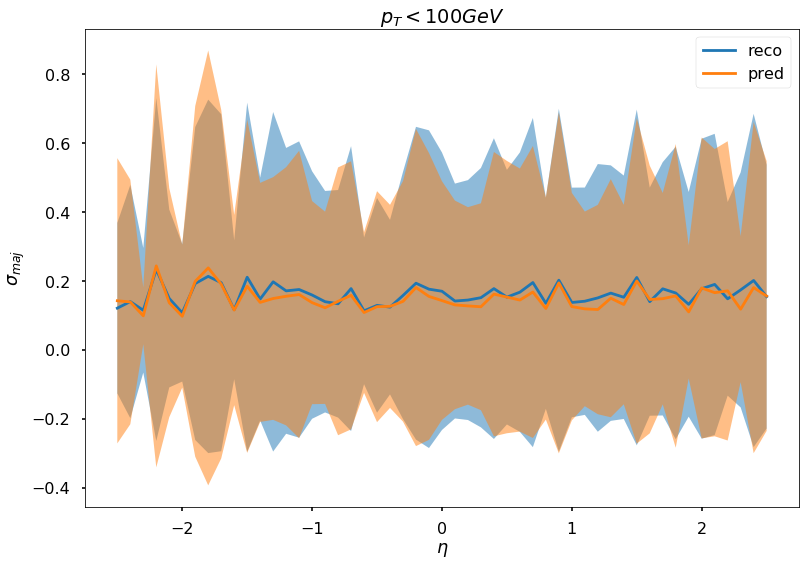

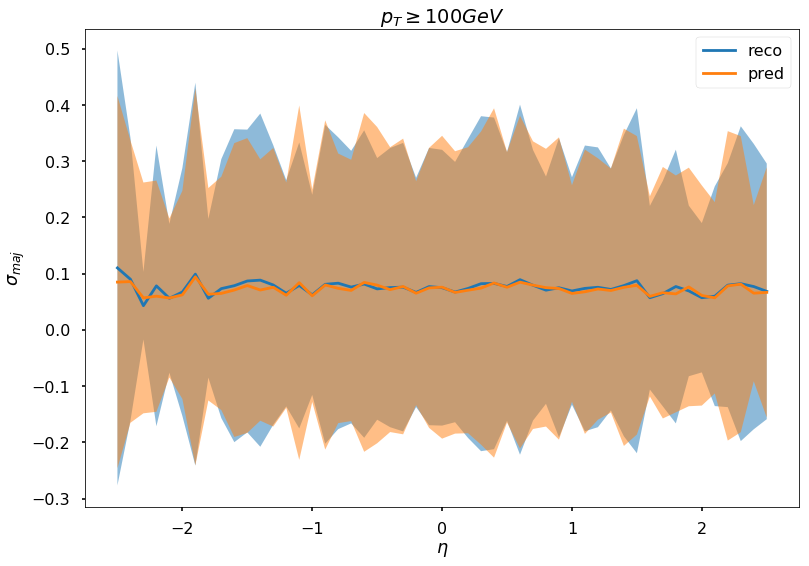

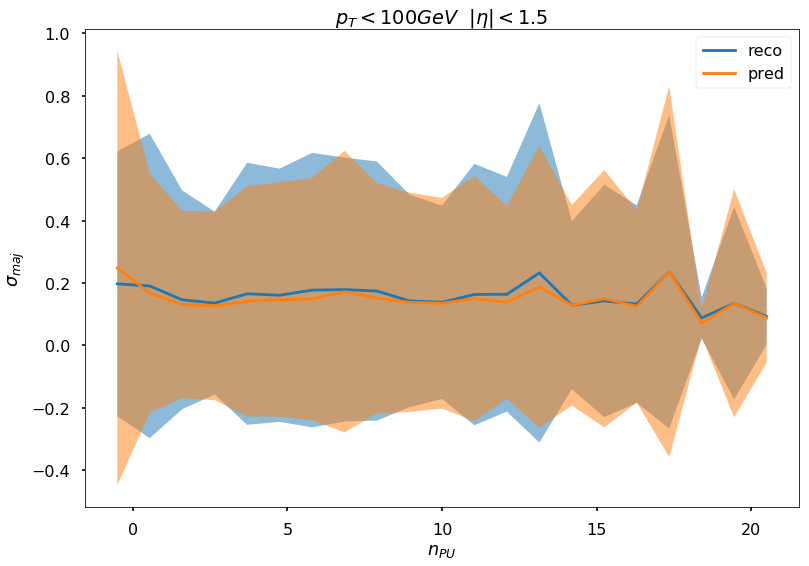

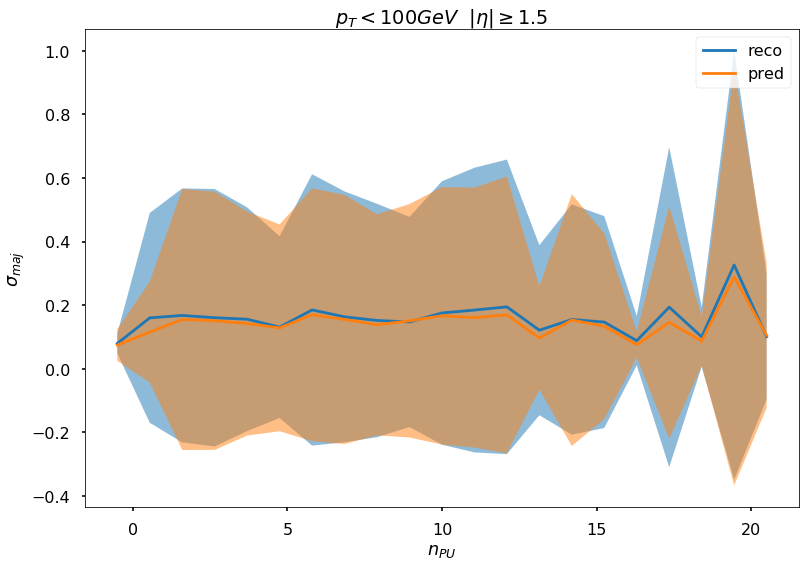

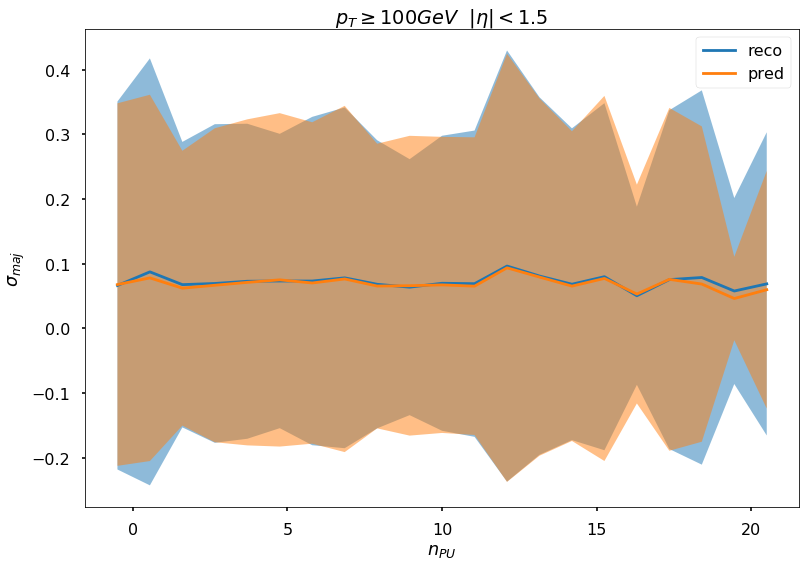

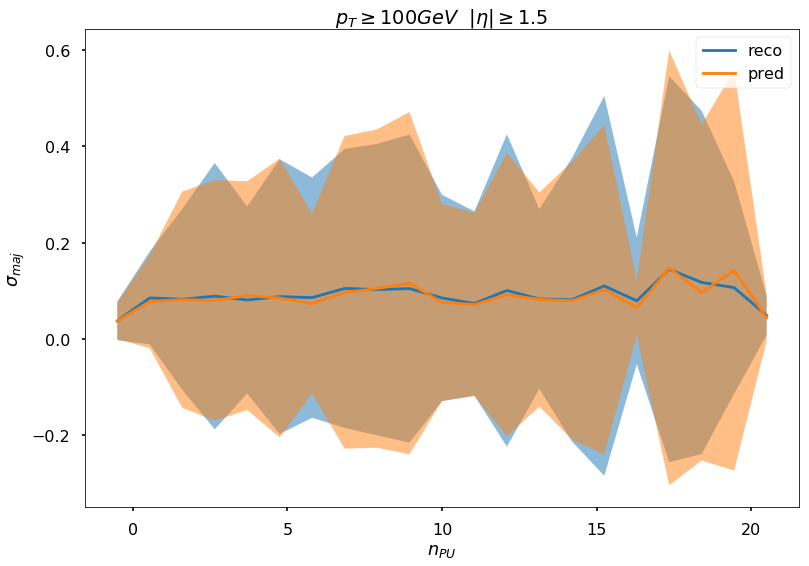

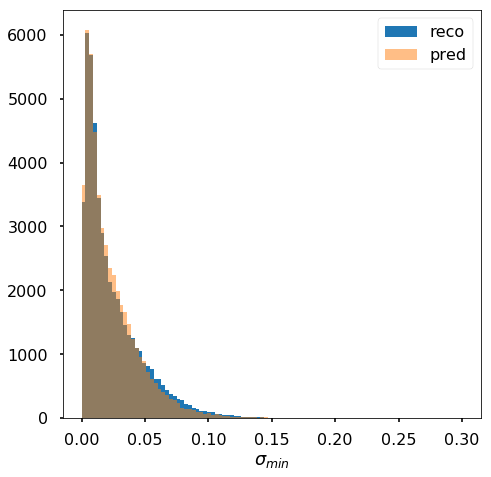

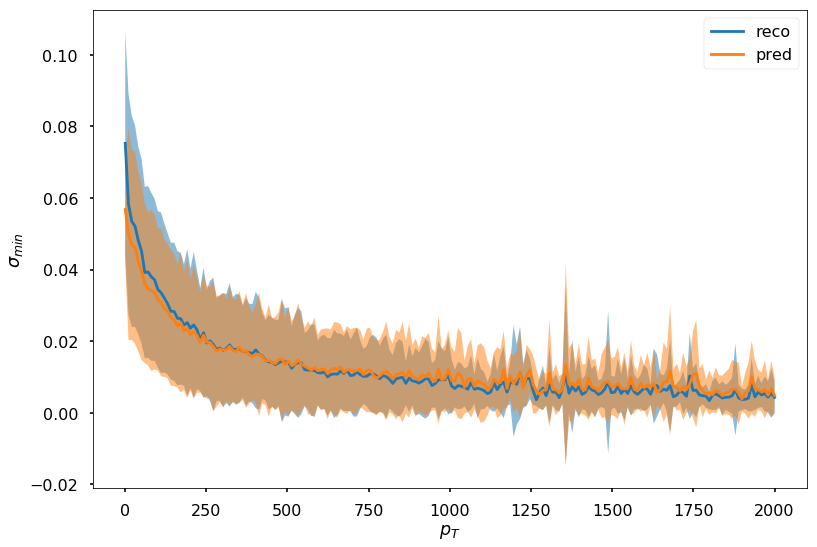

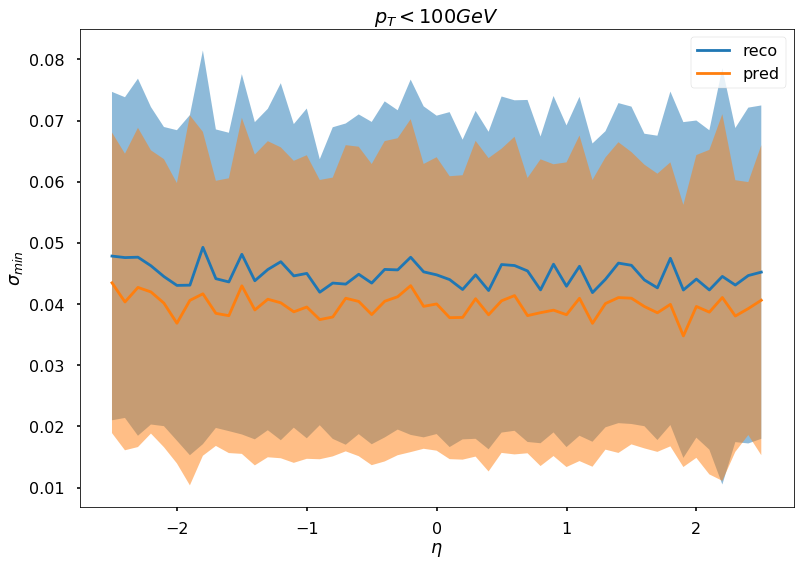

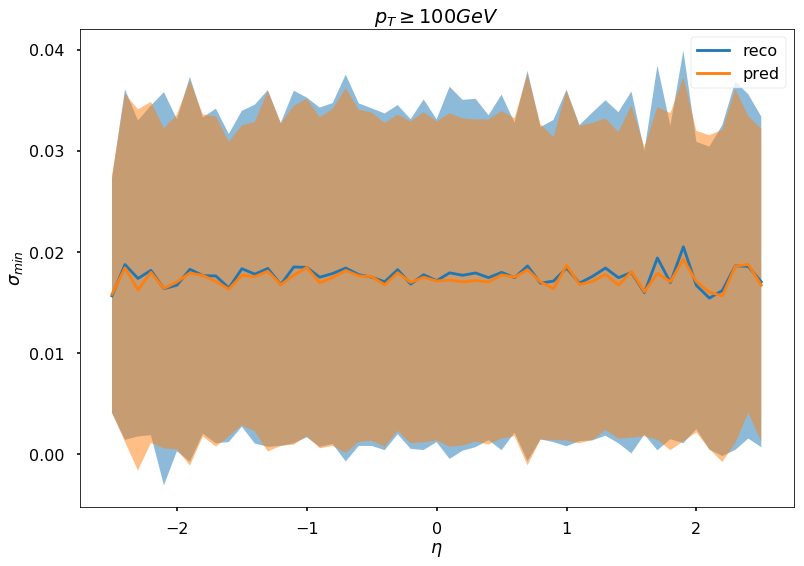

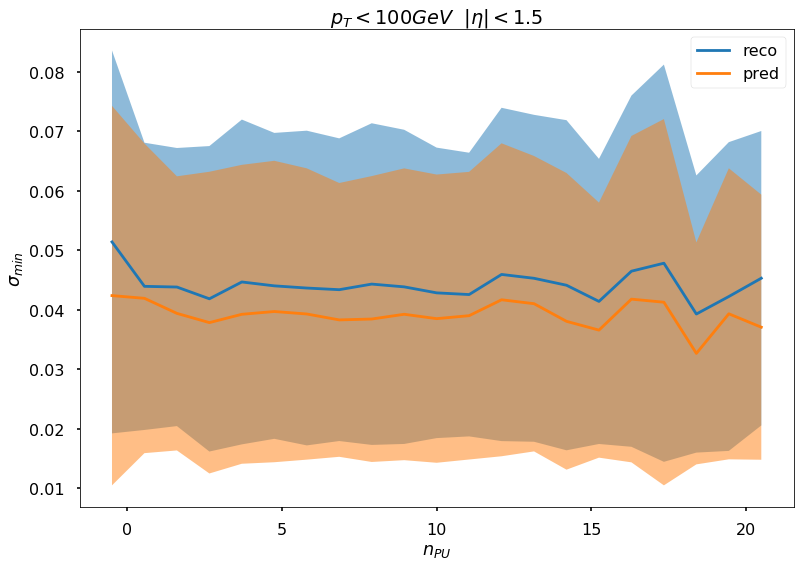

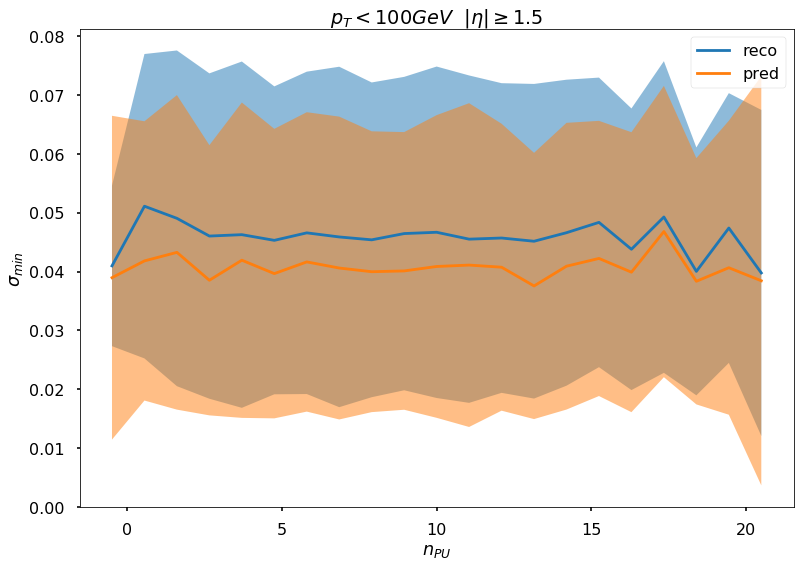

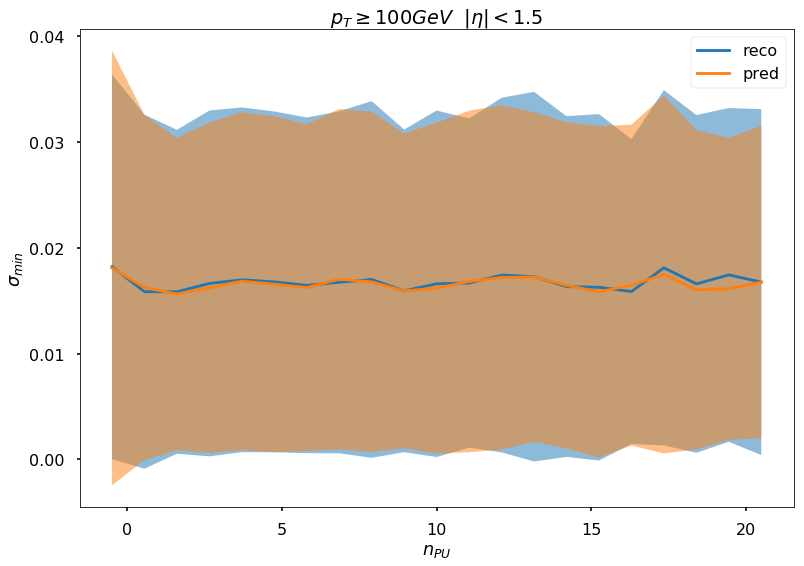

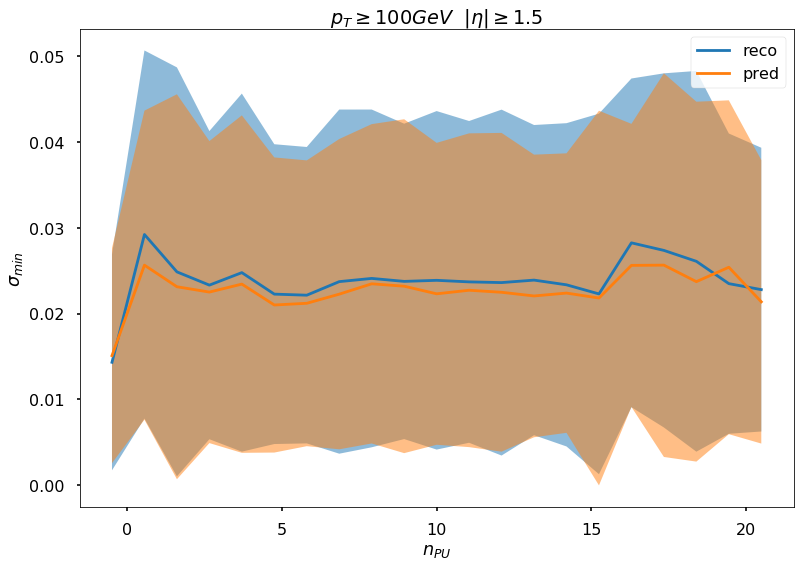

/opt/python/17.06.1/lib/python3.5/site-packages/numpy/lib/function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/opt/python/17.06.1/lib/python3.5/site-packages/numpy/lib/function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


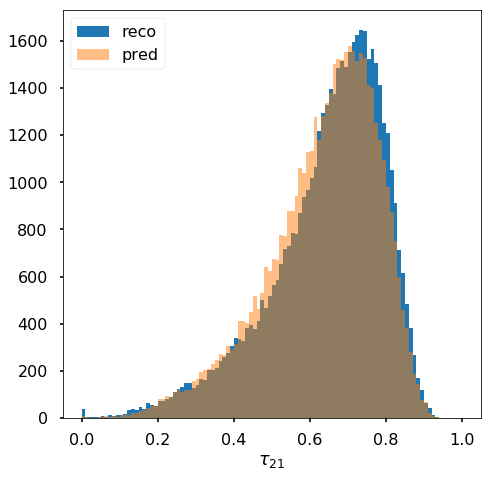

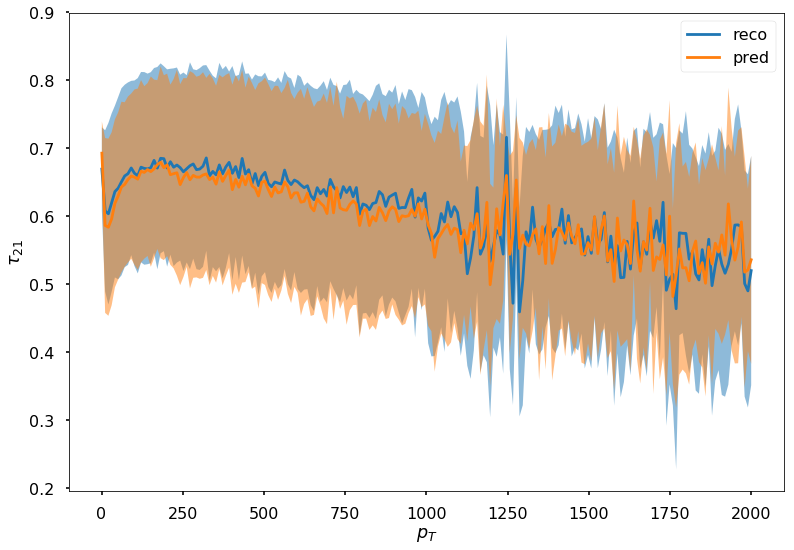

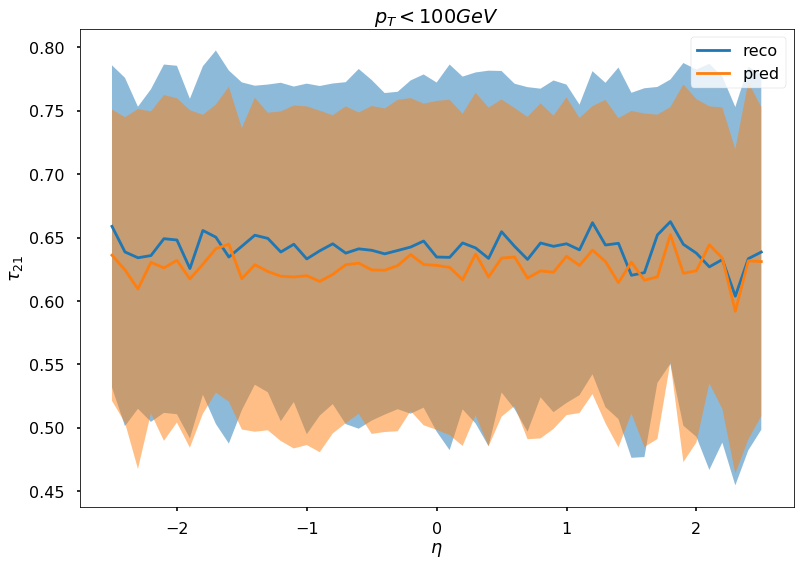

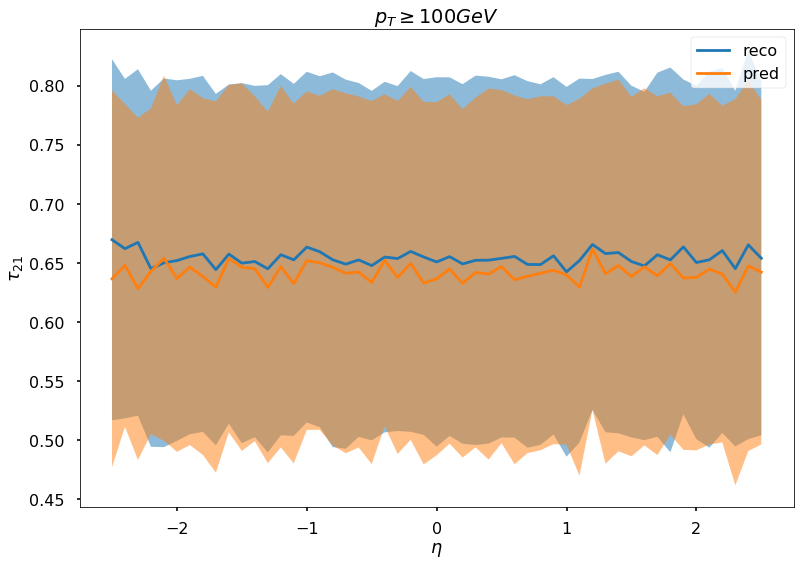

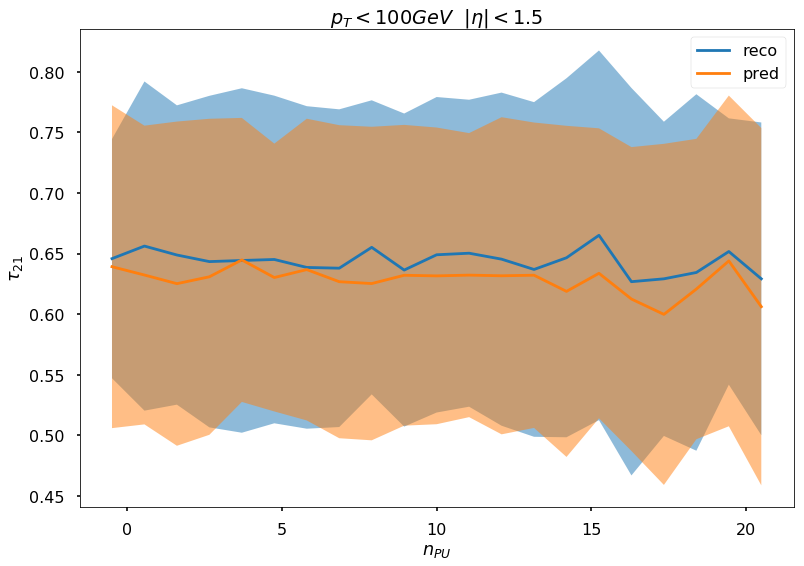

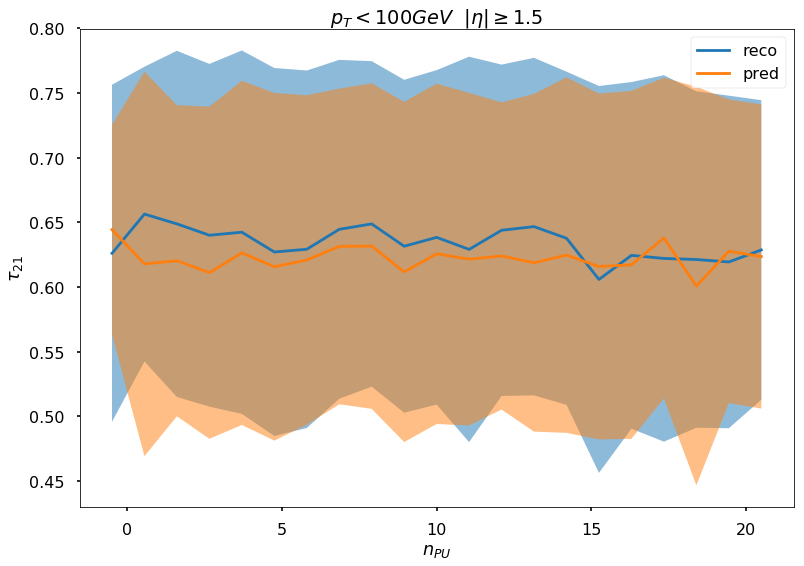

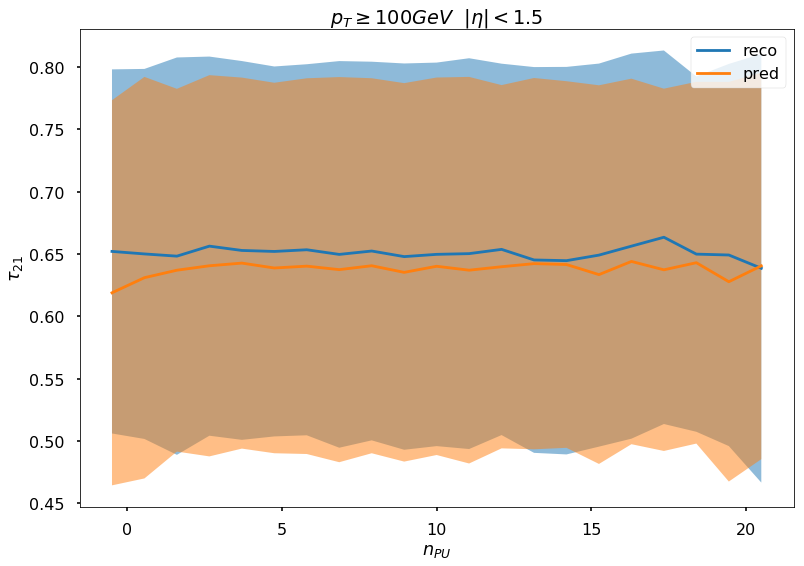

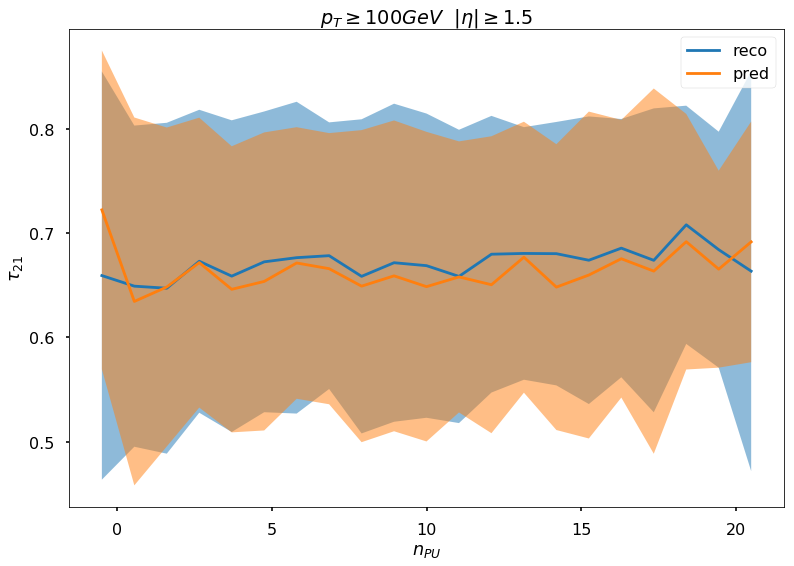

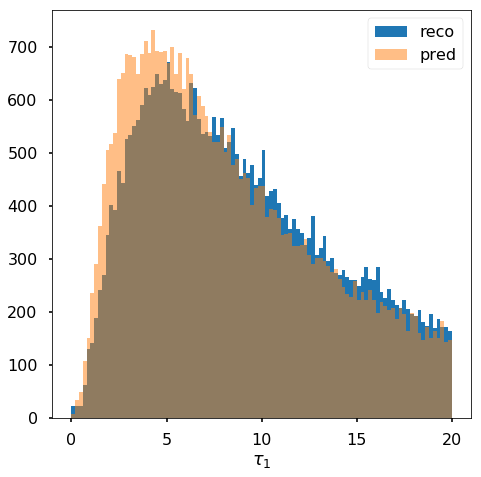

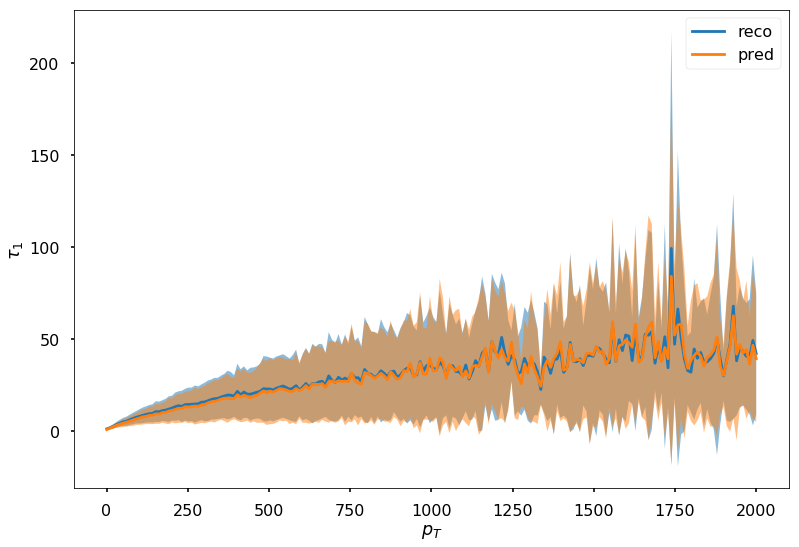

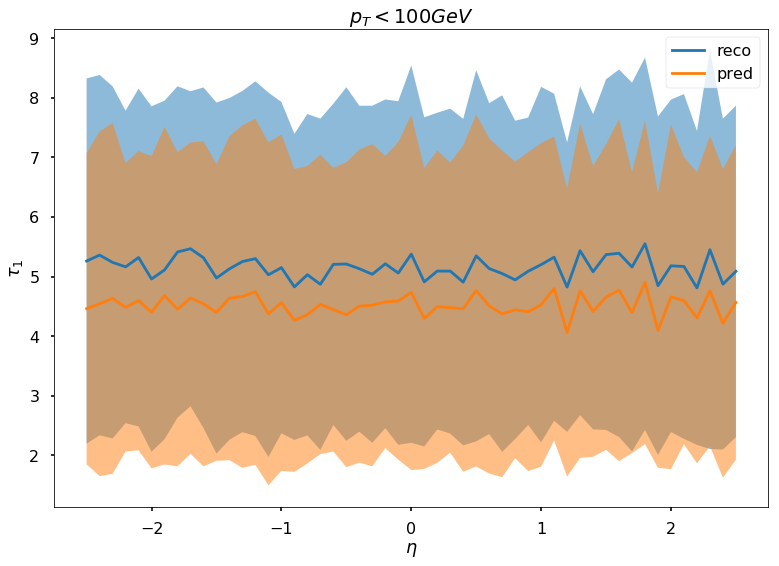

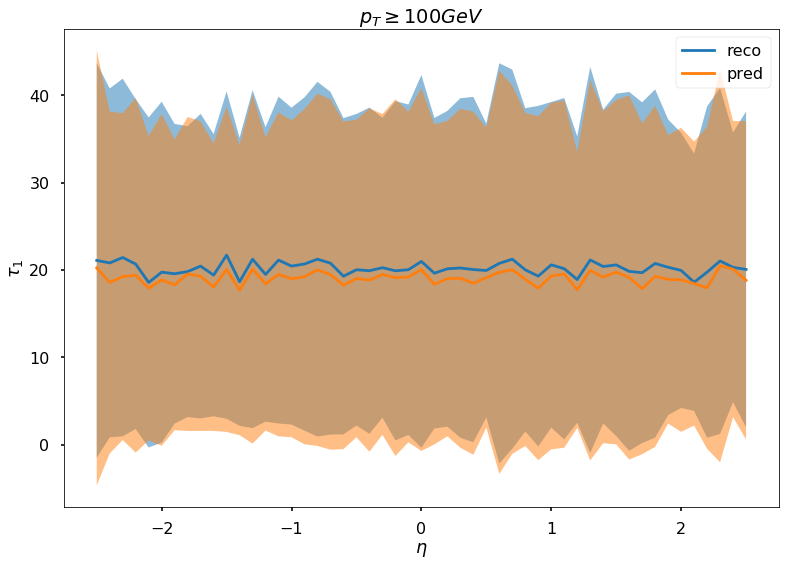

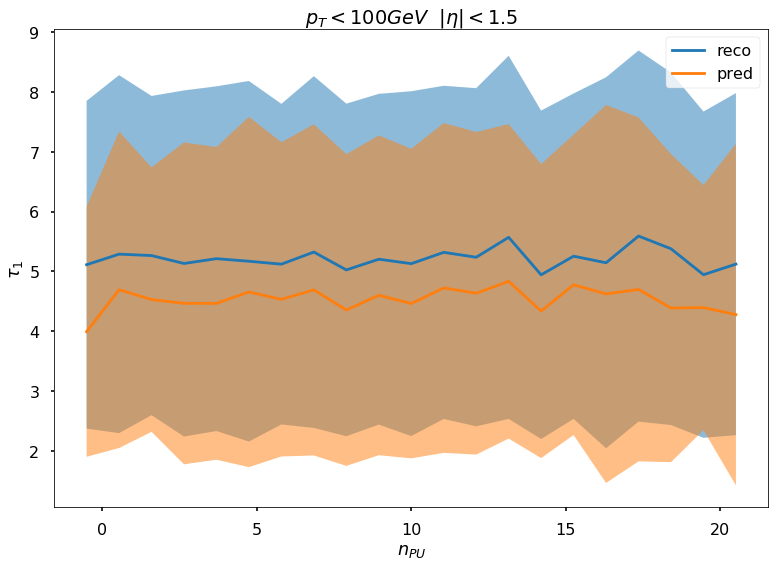

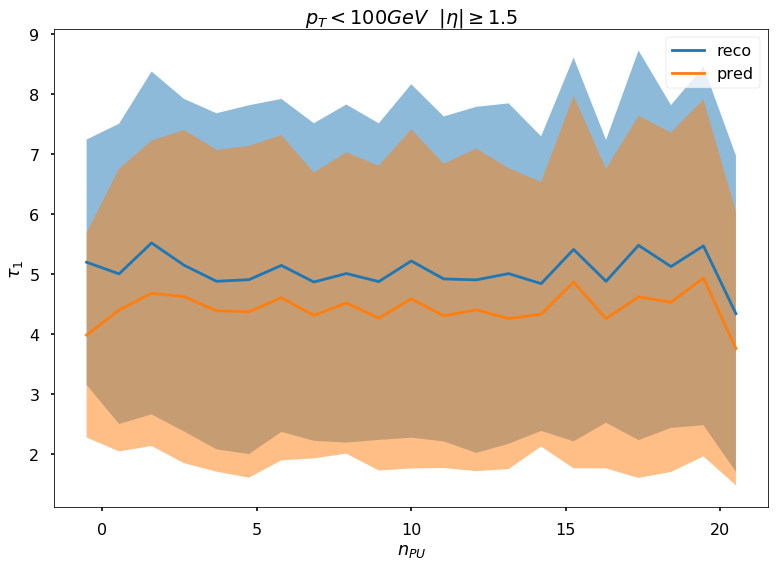

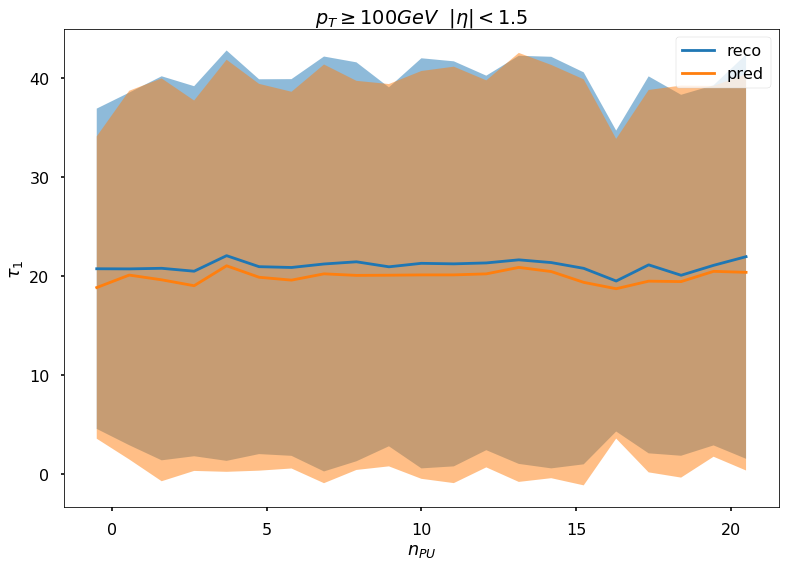

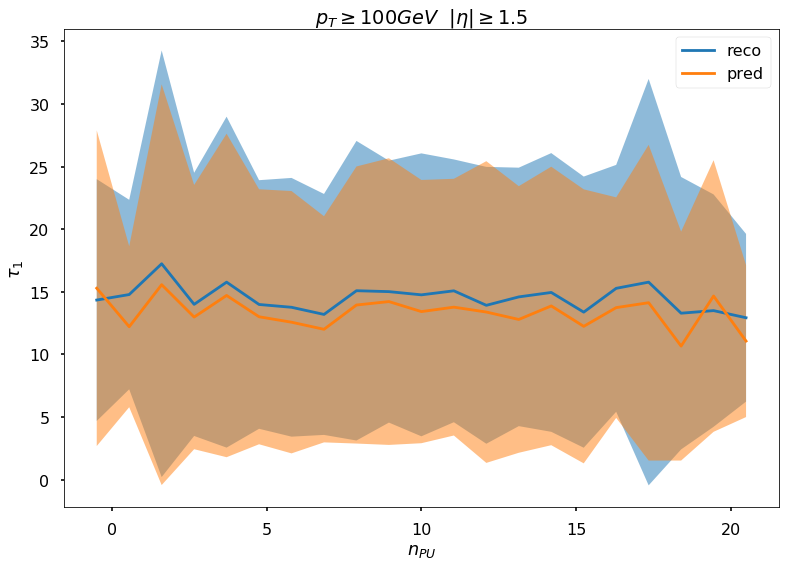

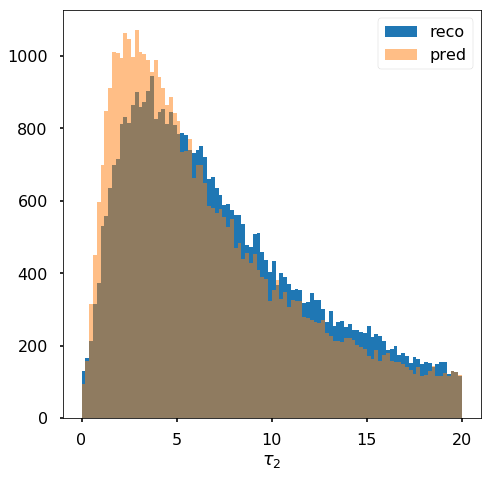

In [ ]:
plot_metrics = {
    0 : dict(xlabel="$p_{T}D$",bins=100,range=[0,1]),
    1 : dict(xlabel="$\sigma_{maj}$",bins=100,range=[0,0.3]),
    2 : dict(xlabel="$\sigma_{min}$",bins=100,range=[0,0.3]),
    3 : dict(xlabel="$\\tau_{21}$",bins=100,range=[0,1]),
    #4 : dict(xlabel="$\\tau_{31}$",bins=100,range=[0,1]),
    4 : dict(xlabel="$\\tau_{1}$",bins=100,range=[0,20]),
    5 : dict(xlabel="$\\tau_{2}$",bins=100,range=[0,20]),
    6 : dict(xlabel="$\\tau_{3}$",bins=100,range=[0,20]),
    7 : dict(xlabel="$\\tau_{32}$",bins=100,range=[0,1]),    
}

# plotting.distrib_metric(sub_reco[:,0],sub_pred[:,0],xlabel="$p_{T}D$",bins=100,range=[0,1])_, bins, _ = plt.hist(sub_reco[:,1],bins=20)
# plt.hist(sub_pred[:,1],alpha=0.5,bins=bins)

# plt.hist(sub_pred[:,2])

reload(plotting)
for key,opts in plot_metrics.items():
    plotting.distrib_metric(sub_reco[:,key],sub_pred[:,key],**opts)
    plt.savefig( "%s/metric_%d.png" % (plots_folder,key) )
    plt.show()
    opts['ylabel'] = opts.pop("xlabel")
    opts.pop('bins')
    opts.pop('range')
    plotting.show_moments(sub_reco[:,key],sub_pred[:,key],cond[:,0,0],np.linspace(1,2000,200),
                          xlabel='$p_T$',weights=weights,**opts)
    plt.savefig( "%s/pt_dep_metric_%d.png" % (plots_folder,key) )
    plt.show()
    
    plotting.show_moments(sub_reco[:,key],sub_pred[:,key],cond[:,0,1],np.linspace(-2.5,2.5,51),
                          mask=cond[:,0,0] < 100,
                          title='$p_T < 100 GeV$',
                          xlabel='$\eta$',weights=weights,**opts)
    plt.savefig( "%s/eta_dep_low_pt_metric_%d.png" % (plots_folder,key) )
    plt.show()
    
    plotting.show_moments(sub_reco[:,key],sub_pred[:,key],cond[:,0,1],np.linspace(-2.5,2.5,51),
                          mask=cond[:,0,0] >= 100,
                          title='$p_T \\geq 100 GeV$',
                          xlabel='$\eta$',weights=weights,**opts)
    plt.savefig( "%s/eta_dep_high_pt_metric_%d.png" % (plots_folder,key) )
    plt.show()
    
    plotting.show_moments(sub_reco[:,key],sub_pred[:,key],cond[:,0,3],np.linspace(-0.5,20.5,21),
                          mask=(cond[:,0,0] < 100) & (np.abs(cond[:,0,1]) < 1.5),
                          title='$p_T < 100 GeV$  $|\eta| <1.5$',
                          xlabel='$n_{PU}$',weights=weights,**opts)
    plt.savefig( "%s/pu_dep_low_pt_low_eta_metric_%d.png" % (plots_folder,key) )
    plt.show()

    plotting.show_moments(sub_reco[:,key],sub_pred[:,key],cond[:,0,3],np.linspace(-0.5,20.5,21),
                          mask=(cond[:,0,0] < 100) & (np.abs(cond[:,0,1]) >= 1.5),
                          title='$p_T < 100 GeV$  $|\eta| \geq 1.5$',
                          xlabel='$n_{PU}$',weights=weights,**opts)
    plt.savefig( "%s/pu_dep_low_pt_high_eta_metric_%d.png" % (plots_folder,key) )
    plt.show()
    
    plotting.show_moments(sub_reco[:,key],sub_pred[:,key],cond[:,0,3],np.linspace(-0.5,20.5,21),
                          mask=(cond[:,0,0] >= 100) & (np.abs(cond[:,0,1]) < 1.5),
                          title='$p_T \geq 100 GeV$  $|\eta| <1.5$',
                          xlabel='$n_{PU}$',weights=weights,**opts)
    plt.savefig( "%s/pu_dep_low_pt_low_eta_metric_%d.png" % (plots_folder,key) )
    plt.show()

    plotting.show_moments(sub_reco[:,key],sub_pred[:,key],cond[:,0,3],np.linspace(-0.5,20.5,21),
                          mask=(cond[:,0,0] >= 100) & (np.abs(cond[:,0,1]) >= 1.5),
                          title='$p_T \geq 100 GeV$  $|\eta| \geq 1.5$',
                          xlabel='$n_{PU}$',weights=weights,**opts)
    plt.savefig( "%s/pu_dep_low_pt_high_eta_metric_%d.png" % (plots_folder,key) )
    plt.show()



In [ ]:
# pred_axis_x = (pred[:,:,:,0] * x).sum(axis=(1,2)) / pred[:,:,:,0].sum(axis=(1,2))
# pred_axis_y = (pred[:,:,:,0] * y).sum(axis=(1,2)) / pred[:,:,:,0].sum(axis=(1,2))

In [ ]:
# reco_axis_x = (reco[:,:,:,0] * x).sum(axis=(1,2)) / reco[:,:,:,0].sum(axis=(1,2))
# reco_axis_y = (reco[:,:,:,0] * y).sum(axis=(1,2)) / reco[:,:,:,0].sum(axis=(1,2))

In [ ]:
# gen_axis_x = (gen[:,:,:,0] * x).sum(axis=(1,2)) / gen[:,:,:,0].sum(axis=(1,2))
# gen_axis_y = (gen[:,:,:,0] * y).sum(axis=(1,2)) / gen[:,:,:,0].sum(axis=(1,2))

In [ ]:
# plt.figure(figsize=(15,7.5))
# plt.subplot(121)
# plt.hist2d(pred_axis_x-gen_axis_x,pred_axis_y-gen_axis_y,bins=100,cmap='Blues',range=[[-2,2],[-2,2]],norm=LogNorm());
# plt.subplot(122)
# plt.hist2d(reco_axis_x-gen_axis_x,reco_axis_y-gen_axis_y,bins=100,cmap='Reds',alpha=0.5,range=[[-2,2],[-2,2]],norm=LogNorm());

In [ ]:
# x, y= np.ogrid[-16:17,-16:17]
# radius = np.sqrt( (x+0.5)**2 + (y+0.5)**2 )

# radius[ radius == 0. ] = 1.

# radius = radius.max() / radius

# radius *= (33*33) / radius.sum()

In [ ]:
# plt.imshow(radius,norm=LogNorm())
# plt.colorbar()

In [ ]:
! rsync -av --delete plots/ lxplus.cern.ch:www/gan/pix2pix

In [ ]:
# import ROOT as RT

# RT.gSystem.Load("./ganja/SubstructureComputer_C.so")
# cmpt = RT.SubstructureComputer()


In [ ]:
# imsize = 3
# arr= np.ones( (10, imsize,imsize), dtype=np.float32 )
# ## arr[0] = 0.
# etas = ( np.arange( imsize, dtype=np.float32 ).reshape(1,-1,imsize) + imsize / 2. ) * 0.3+ ( np.arange( 10 ).reshape(-1,1,1) -5. ) * 0.2
# phis = ( np.arange( imsize, dtype=np.float32 ).reshape(1,imsize,-1) + imsize / 2. ) * 0.3
# ## c( arr, etas, phis )


# import numpy as np

# def img2p4(arr, etas, phis ):
#     mom = arr * np.cosh( etas )
#     px = arr * np.cos( phis )
#     py = arr * np.sin( phis )
#     pz = np.sqrt( mom*mom - px*px -py*py)
#     mask = mom != 0
#     return mom[mask].ravel(), px[mask].ravel(), py[mask].ravel(), pz[mask].ravel()

# c = RT.SubstructureComputer()

# for ijet in range(arr.shape[0]):
#     p4 = img2p4( arr[ijet], etas[ijet], phis[0] )
#     print(etas[ijet].mean())

#     c( p4[0].shape[-1], p4[0].astype(np.float32, order='F'), p4[1].astype(np.float32, order='F'), p4[2].astype(np.float32, order='F'), p4[3].astype(np.float32, order='F') )
    
#     print( c.ptD, c.axis1, c.axis2, c.tau21, c.tau1, c.tau2, c.tau3 )

In [ ]:
# biases = []
# for layer in model.layers:
#     if len(layer.get_weights()) == 2:
#         biases.append((layer.name,layer.get_weights()[1]))

In [ ]:
# for name,bias in biases:
#     alpha = None
#     if "dec" in name:
#         alpha = 0.5
#     plt.hist(bias,label=name,alpha=alpha)
# plt.legend()